In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>")) #$\color{red}{\text{ciao}}$

# Python para Finanzas y Ciencia de Datos
____

# Módulo 4
#### Profesor: Jonatan Saúl

1. Statistics Concepts
2. Portfolio Optimization
3. Principal Component Analysis (PCA)
4. Value-at-Risk (VaR)
____

In [3]:
# IMPORTAMOS LAS LIBRERÍAS QUE VAMOS A USAR A LO LARGO DEL MÓDULO.
import numpy as np
import pandas as pd
import pandas_datareader.data as reader

from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta
from numpy.random import multivariate_normal
import yfinance as yf

import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy.stats import gaussian_kde

import statsmodels.api as sm

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import seaborn as sns

#import functions as f 

import random
random.seed(1000)


# Portfolio optimization: Modern Portfolio Theory

* * *

In 1952, Harry Markowitz proposed a normative model for selection of risky assets. 

The basic assumption was that inversors care about the **return** and **risk** of their portfolios. 

His great contribution was to define **return** as the mean of the probability distribution of assets returns and **risk** as the variance of that distribution.

By defining risk as variance, Markowitz was able to quantify precisely the gains of diversification: through diversification, risk can be reduced (though not eliminated) without changing the expected portfolio return.


## Basic theory

### The expected return on a portfolio

The return of a risky asset *j* will be defined as

$$ R_{j,t+1,s} = \dfrac{P_{j,t+1,s} - P_{j,t}}{P_{j,t}}$$

Where $P$ denotes the price of the asset, $t$ is the date in which the asset is bought, $t+1$ is the date in which the asset is sold and $s$ denote the state of nature.

For simplicity, we will asume that the return's distribution is discrete and $\pi_s$ is the probability of each state of the nature. Thus, its expectation equals:

$$E(R_{j,t+1}) = \sum_{s = 1}^S \pi_s R_{j,t+1,s}$$

Consider a portfolio consisting of N assets, and let $\omega_j$ be the weight of each asset in the cost of the portfolio, then the return of this portfolio is:

$$R_{p,t+1,s}  = \sum_{j=1}^N \omega_j R_{j,t+1,s}$$

That is, the return on a portfolio is a weithed average of the returns of the assets in the portfolio.

The portfolio's expected return is also the weigthed average of the asset expected returns:

$$E(R_p) = \sum_{j=1}^N\omega_jE(R_j)$$


### Measurement of risk and diversification

The variance of an asset return equals:

$$\sigma_j^2 = E [R_j - E(R_j)]^2 = \sum_{s=1}^S \pi_s [R_j - E(R_j)]^2$$


In order to understand how can a portfolio reduce its risk through diversification, let's asume we only have two assets. The variance of this two-assets portfolio is:

$$ \sigma^2_p = \omega^2\sigma_1^2 + (1 - \omega)^2\sigma_2^2 + 2 \omega(1 - \omega)\sigma_{12}$$

$$ \sigma^2_p = \omega^2\sigma_1^2 + (1 - \omega)^2\sigma_2^2 + 2 \omega(1 - \omega)\rho_{12}\sigma_1\sigma_2$$

Note that the variance of the portfolio depends on the correlation between the assets. We will explore how different correlations have a different impact on the variance of the portfolio and therefore in diversification gains.


The entire model is described by mean and variance of the assets. 

Therefore we are necessarily assuming that no other statistics are necessary to describe the distribution of end-of-period wealth. 

Since normal distribution is determined by mean and variance, if returns are normal distributed then we can fully describe the investment opportunity set. We will need to verify this condition and in case it doesn't hold we will have to assume so.

We define the **invesment opportunity set** as the pairs of mean and standard deviation that can be achived by inversing arbitrary amounts in the *N* risky assets. The **frontier** of the invesment opportunity set is defined as the set of portfolios with minimum variance among all portfolios with equal expected returns.


### Sharpe ratio

In order to be capable to compare between different investment choices, we need a risk-adjusted return measure. Sharpe ratio is defined as the excess portfolio return over the risk-free rate relative to its standard deviation:

$$ S = \dfrac{E(R_p) - R_f}{\sigma_p}$$

where $R_f$ is the risk free rate of the market.

### Matrix notation

For computational purposes it is much more useful to have a matrix representation of the above measures of the porfolio.

The expected return of the porfolio is:

$$E(R_p) = \omega' E(R)$$

where $E(R)$ is the vector containing the expected returns of all the assets and $\omega$ is the vector of weights.


The variance of the portfolio is:

$$\sigma_p^2 = \omega' \Sigma \omega$$

where $\Sigma$ is the covariance matrix of the returns:

$$ \Sigma =  \begin{bmatrix} \sigma_1^2 & \sigma_{1,2} & \dots & \sigma_{1,N}\\
\sigma_{2,1} & \sigma_{2}^2 & \dots & \sigma_{2,N}\\
\vdots & \vdots & \ddots & \vdots\\
\sigma_{N,1} & \sigma_{N,2} & \dots & \sigma_{N}^2
\end{bmatrix}$$

### Different correlations

Supose we have 2 normaly distributed assets.  We want to explore how a different correlation between them can generate different results in terms of diversification gains.

Recall the variance of the portfolio is


$$ \sigma^2_p = \omega^2\sigma_1^2 + (1 - \omega)^2\sigma_2^2 + 2 \omega(1 - \omega)\rho_{12}\sigma_1\sigma_2$$

Let's asume for simplicity that both assets have the same variance. Then,

$$ \sigma^2_p = \left[1 - 2\omega(1 - \omega)(1 - \rho_{12})\right]\sigma^2$$

This allows as to visualize the reduction of the portfolio variance compared to the variance of the assets, i.e. diversification gains.



#### Case 1: Uncorrelated returns ($\rho =0$)

The maximum reduction in variance is achived when the inversment is equally split across securities ($\omega = 1/2$), which gives:

$$ \sigma^2_p = [1 - 2\omega(1 - \omega)]\sigma^2$$

$$\sigma^2_p = \left[1 - \dfrac{1}{2}\right]\sigma^2  = \dfrac{1}{2}\sigma^2$$

This means that by combining the two assets, variance can be reduced to half of individual variances. 

This makes sense if we think of what a zero correlation means. Think for instance of tossing a coin twice, where the outcome of each toss is independent of the other. 

If instead of betting everything on a single toss we split out money into two toss, some losses will be offset by gains on the other gamble, but we may still lose on boths. 

Risk is reduced but not eliminated.

We will set the same variances for both assets and equal to 1. This will imply that $\rho_{12} = \dfrac{cov_{12}}{var_1 var_2} = cov_{12}$. Let's also assume that the assets means are 1 and 2.

In [4]:
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

def portf_mean(w, mean):
    mu = w.dot(mean)
    return mu
    
def portf_var(w, cov_matrix):
    
    sigma2 = np.diagonal(w.dot(cov_matrix).dot(w.T))
    return sigma2    

In [5]:
weights = np.zeros((500,2))

In [6]:
for i in range(len(weights)):
    weights[i] = rand_weights(2)

In [7]:
print(type(weights))
print(weights.shape)
#print(weights)

<class 'numpy.ndarray'>
(500, 2)


In [8]:
var1 = 1
var2 = 1
var= [var1, var2]
mean = [1,2]

print(f'Variance: {var}')
print(f'Mean: {mean}')

Variance: [1, 1]
Mean: [1, 2]


Let's plot the results...

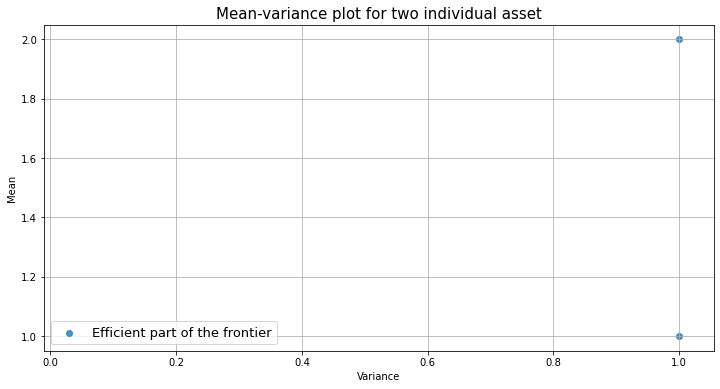

In [9]:
fig = plt.figure(figsize = (12,6))
plt.scatter(var, mean, marker='o',alpha = 0.8, label = 'Efficient part of the frontier')



plt.xlabel('Variance')
plt.ylabel('Mean')
plt.xlim(-0.01)
plt.legend(loc='lower left', fontsize = 13)
plt.title('Mean-variance plot for two individual asset', fontsize = 15)
plt.grid(True)

Python *zip() Function* https://www.w3schools.com/python/ref_func_zip.asp

We use zip(X, Y) to create an iterator that produces tuples of the form (x, y).

In [10]:
x = zip(mean, var)
list(x)

[(1, 1), (2, 1)]

In [11]:
first_names = ['Jane', 'John', 'Jennifer']
last_names = ['Doe', 'Williams', 'Smith']

for first, last in zip(first_names, last_names):
    print(first, last)

Jane Doe
John Williams
Jennifer Smith


In [12]:
first_names = ['Jane', 'John', 'Jennifer']
last_names = ['Doe', 'Williams', 'Smith']
ages = [20, 40, 30]

for first, last, age in zip(first_names, last_names, ages):
    print(f'{first} {last} is {age} years old')
    
print('-'*100)

Jane Doe is 20 years old
John Williams is 40 years old
Jennifer Smith is 30 years old
----------------------------------------------------------------------------------------------------


In [13]:
nombres = zip(first_names, last_names, ages)
list(nombres)

[('Jane', 'Doe', 20), ('John', 'Williams', 40), ('Jennifer', 'Smith', 30)]

Let's create a function that plots the results

In [14]:
def mean_var_plot(mean, var, corr):
    fig = plt.figure(figsize = (22,9))              
    plt.scatter(var, mean, marker='o',alpha = 0.8, label = 'Efficient part of the frontier')
    
    if corr == 1:
        for mu, sigma in zip(mean, var):
            if mu < max(mean):
                plt.scatter(sigma, mu, color = 'red')
        plt.scatter(x= var[np.argmax(mean)], y = max(mean), 
                    lw = 8, label = 'Minimum variance achieved',  marker= "X", c ='gold', s=70)

    else:
        for mu, sigma in zip(mean, var):
            if mu < mean[np.argmin(var)]:
                plt.scatter(sigma, mu, color = 'red')
        plt.scatter(x= min(var), y = mean[np.argmin(var)], marker= "X",
                   lw = 8, label = 'Minimum variance achieved', c ='gold', s=70)                
            
    plt.xlabel('Variance')
    plt.ylabel('Mean')
    plt.xlim(-0.01)
    plt.legend(loc='lower left', fontsize = 13)
    plt.title('Mean-variance frontiers for two asset with correlation '+ str(corr), fontsize = 15)
    plt.grid(True)
    
    return

In [15]:
#Case 1
cov1 = 0
cov_matrix1 = np.asarray([[var1, cov1],
              [cov1, var2]])
case1 = multivariate_normal(mean, cov_matrix1, size = 100)
mean_p1= portf_mean(weights, mean)
var_p1 = portf_var(weights, cov_matrix1)

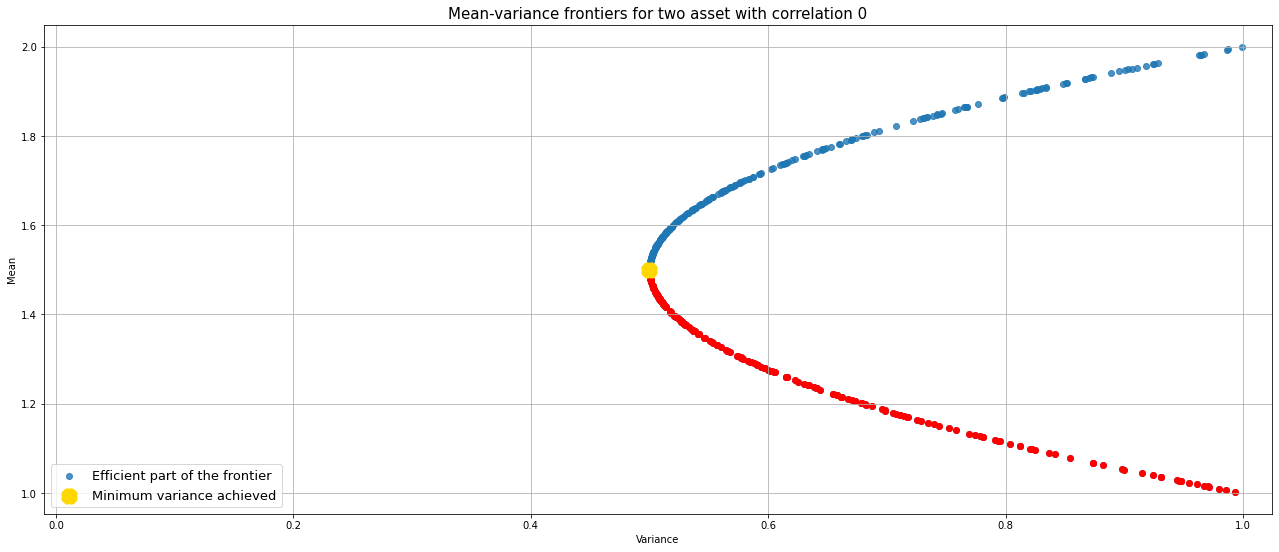

In [16]:
mean_var_plot(mean_p1, var_p1, corr = 0)

#### Case 2: Imperfectly positively correlated returns ($\rho =0.5$)

$$ \sigma^2_p = [1 - \omega(1 - \omega)]\sigma^2$$

Again, the maximum reduction in variance is achieved when the investment is equally split aross assets, but now:

$$ \sigma^2_p = \left[1 - \dfrac{1}{4}\right]\sigma^2 = \dfrac{3}{4}\sigma^2$$

Only a quarter of individual variance can be reduced. Losses are offset by gains but assets returns tend to move in the same direction, so such compensations across assets are less frequent.


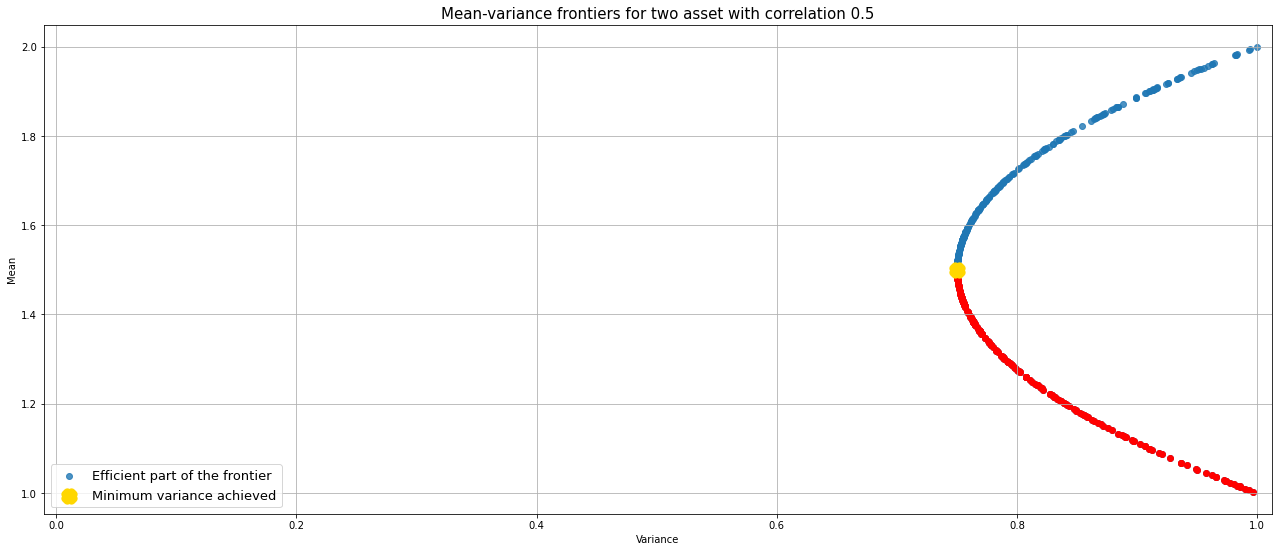

In [17]:
#Case 2
cov2 = 0.5
cov_matrix2 = [[var1, cov2],
              [cov2, var2]]
case2 = multivariate_normal(mean, cov_matrix2, size = 100)
mean_p2= portf_mean(weights, mean)
var_p2 = portf_var(weights,cov_matrix2)

mean_var_plot(mean_p2, var_p2, corr = 0.5)

#### Case 3: Perfectly positively correlated returns ($\rho = 1$)

$$ \sigma^2_p = [1 - 2\omega(1 - \omega)(1-1)]\sigma^2 = \sigma^2$$

Since assets always move in the same direction, there is no diversification gains.


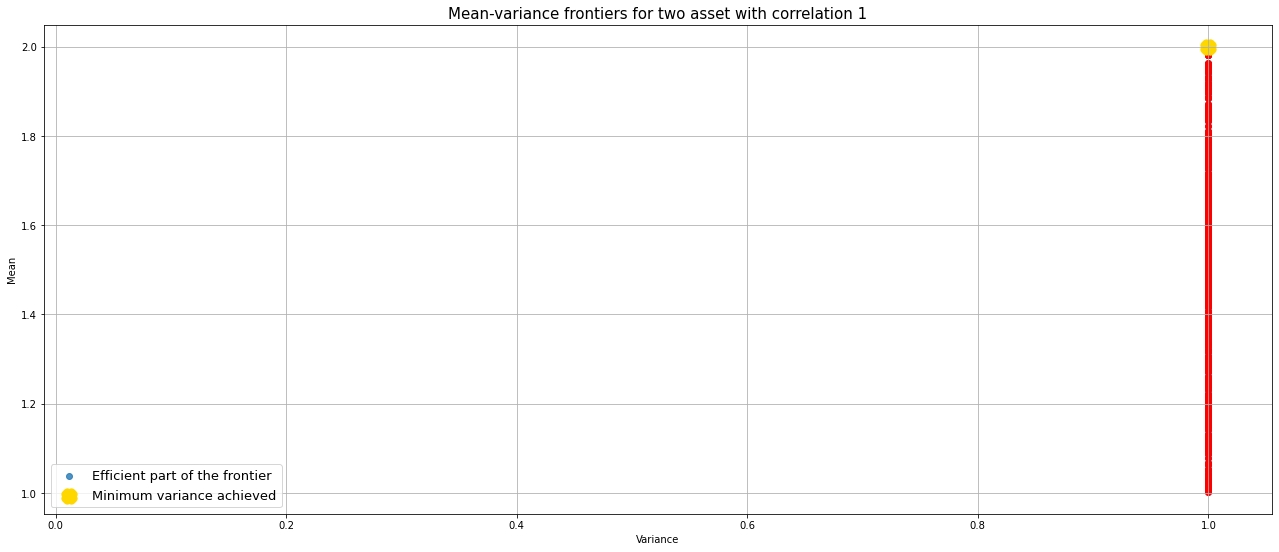

In [18]:
#Case 3
cov3 = 1
cov_matrix3 = [[var1, cov3],
              [cov3, var2]]
case3 = multivariate_normal(mean, cov_matrix3, size = 100)
mean_p3= portf_mean(weights, mean)
var_p3 = portf_var(weights, cov_matrix3)

mean_var_plot(mean_p3, var_p3, corr = 1)

#### Case 4: Imperfectly negatively correlated returns  ($\rho = -0.5$)

$$ \sigma^2_p = [1 - 3\omega(1 - \omega)]\sigma^2 $$

With $\omega = 1/2$:

$$ \sigma^2_p = \left[1 - \dfrac{3}{4}\right]\sigma^2 = \dfrac{1}{4}\sigma^2$$

Losses on one asset are offset by gains on the other. This happens more frequently than in the no correlation case, as asset returns tend to move in opposite directions.


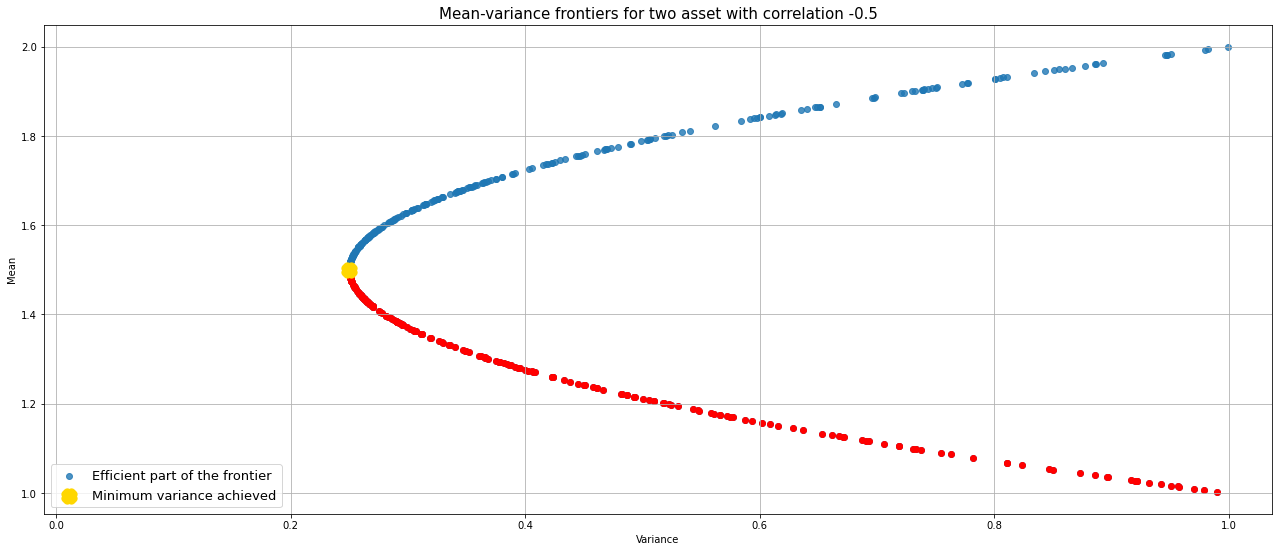

In [19]:
#Case 4
cov4 = -0.5
cov_matrix4 = [[var1, cov4],
              [cov4, var2]]
case4 = multivariate_normal(mean, cov_matrix4, size = 100)
mean_p4= portf_mean(weights, mean)
var_p4 = portf_var(weights, cov_matrix4)

mean_var_plot(mean_p4, var_p4, corr = -0.5)

#### Case 5: Perfectly negatively correlated returns ($\rho = -1$)

$$ \sigma^2_p = [1 - 4\omega(1 - \omega)(1-1)]\sigma^2$$

Setting $\omega = 1/2$ we get:

$$ \sigma^2_p = \left[1 - \dfrac{4}{4}\right]\sigma^2 = 0 $$

In this case losses are always compensated with gains so we can completely eliminate variance. Instead of risk diversification, we are actually talking about *risk hedging*. 

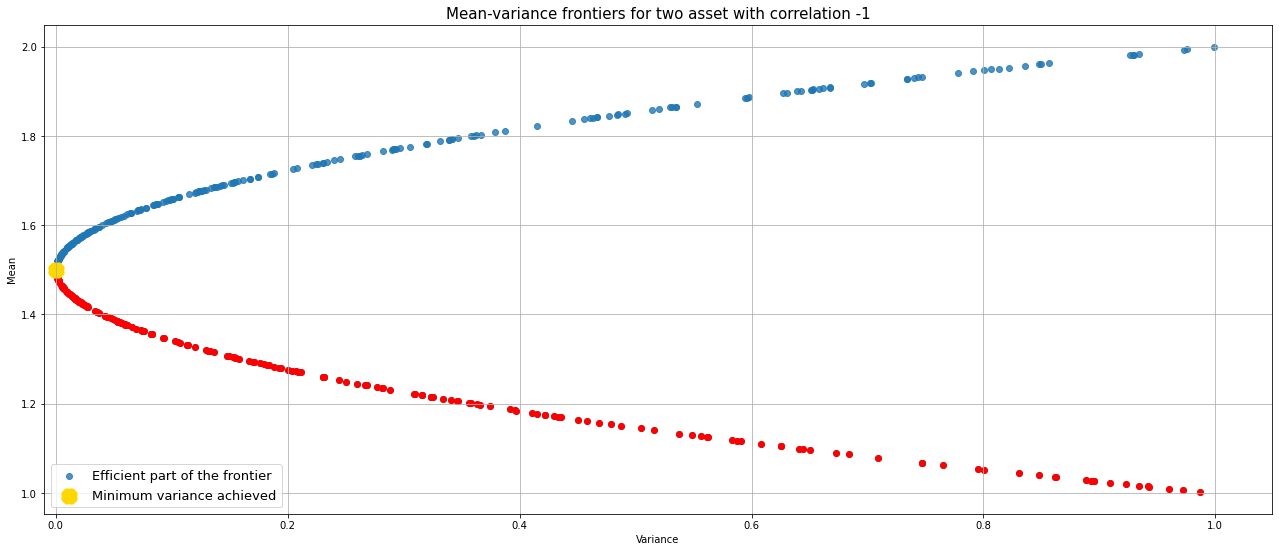

In [20]:
#Case 5
cov5 = -1
cov_matrix5 = [[var1, cov5],
              [cov5, var2]]
case5 = multivariate_normal(mean, cov_matrix5, size = 100)
mean_p5= portf_mean(weights, mean)
var_p5 = portf_var(weights, cov_matrix5)

mean_var_plot(mean_p5, var_p5, corr = -1)

In [ ]:
fig = plt.figure(figsize = (22,9))              
plt.scatter(var_p1, mean_p1, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 1: no correlation')
plt.scatter(var_p2, mean_p2, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 2: 0.5 correlation') 
plt.scatter(var_p3, mean_p3, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 3: perfect positive correlation') 
plt.scatter(var_p4, mean_p4, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 4: -0.5 correlation') 
plt.scatter(var_p5, mean_p5, marker='o', lw = 0.1, alpha = 0.8, label = 'Case 5: perfect negative correlation') 

plt.xlabel('Variance', fontsize = 15)
plt.ylabel('Mean', fontsize = 15)
plt.xlim(0)
plt.legend(loc='lower left', fontsize = 15)
plt.grid(True)
plt.title('Mean-variance frontiers for different correlations', fontsize = 17)

In [ ]:
def returns_plot(cov):
    cov_matrix = np.asarray([[1, cov],
              [cov, 1]])
    mean = [0,0]
    case = multivariate_normal(mean, cov_matrix, size = 1000)
    
    fig = plt.figure(figsize = (22,9))
    
    plt.scatter(x=case[:,0], y=case[:,1])
    plt.xlabel('Asset 1 returns', fontsize = 12)
    plt.ylabel('Asset 2 returns', fontsize = 12)
    plt.title('Scatter plot of assets returns with correlation '+ str(cov), fontsize = 15)
    plt.xlim(-4,4)
    plt.grid(True)
    
    return 

In [ ]:
cor = float(input("Correlation: "))
if cor> 1 or cor< -1:
    print('Error! Correlation must be between -1 and 1')
else:
    returns_plot(cor)

Let's now add a third asset.

In [ ]:
weights = np.zeros((2000,3))
for i in range(len(weights)):
    weights[i] = rand_weights(3)

In [ ]:
noa = 3
n_obs = 10000

return_vec = np.random.randn(noa, n_obs)

In [ ]:
pmean = portf_mean(weights, np.mean(return_vec, axis = 1))
pvar = portf_var(weights, np.cov(return_vec))

In [ ]:
print('-'*100)
print(f' pmean type variable: {type(pmean)}, pmean Shape: {pmean.shape}')
print('-'*100)
print(f' pvar type variable: {type(pvar)}, pvar Shape: {pvar.shape}')
print('-'*100)

In [ ]:
fig = plt.figure(figsize = (22,9))          
plt.scatter(pvar, pmean, marker='o', lw = 0.1, alpha = 0.8, c = pmean/np.sqrt(pvar))
plt.grid(True)
plt.title('Mean-variance of a portfolio with three assets', fontsize = 17)
plt.xlabel('Variance', fontsize = 14)
plt.ylabel('Mean', fontsize = 14)
plt.colorbar(label = 'Sharpe ratio')
;

The graph above shows that when we invest in the three assets simultaneously, not only do we have access to more combinations of mean and variance, but also to better combinations. By adding a third asset to the portfolio, we profit from further diversification gains.

When calculating the Shapre ratio we assume $R_f = 0$

## Efficient frontier

It is clear that not all weight distriburions perfom well when measured in terms of mean and variance. For example, for a fixed level of expected returns, say 0.04,  there are multiples portfolios that show different levels of risk. A rational investor would only be interested in the minimum risk given a fixed expected return, or the maximum return given a fixed risk level. This set of portfolios then makes up the so-called **efficient frontier**, which we will find now.

We will explain in detail the steps for finding the efficient frontier later.

In [ ]:
bnds = tuple((0, 1) for x in range(noa))

def min_func_port(w):
    return statistics(w)[1]

def statistics(weights):
    
    weights = np.array(weights) 
    pret = np.sum(np.mean(return_vec, axis = 1) * weights)
    pvol = np.dot(weights, np.dot(np.cov(return_vec), weights.T))
    
    return np.array([pret, pvol, pret / pvol])

trets = np.linspace(pmean.min(), pmean.max(), 100)
tvols = []

ef_we = []

for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}, 
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, [noa * [1. / noa,]], method='SLSQP',  
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
    ef_we.append(res['x'].round(3))
       
tvols = np.array(tvols)

ind = np.argmin(tvols)
tvols = tvols[ind:]
trets = trets[ind:]

In [ ]:
fig = plt.figure(figsize = (22,9))          
plt.scatter(pvar, pmean, marker='o', lw = 0.1, alpha = 0.8, c = pmean/np.sqrt(pvar))
plt.scatter(tvols, trets, c = 'deeppink', marker='o', label='Efficient frontier', lw = 2)
x = np.linspace(0.0, 5)

plt.grid(True)
plt.title('Efficient frontier of a portfolio with three assets', fontsize = 15)
plt.xlabel('Variance', fontsize = 12)
plt.ylabel('Mean', fontsize = 12)
plt.colorbar(label = 'Sharpe ratio')
plt.legend(loc='best', fontsize = 12)

## Real data

Let's apply the theory to some real assets.

https://pypi.org/project/yfinance/

#### 11 sectors under the Global Industry Classification Standard:
  -  Energy
  -  Materials
  -  Industrials
  -  Utilities
  -  Healthcare
  -  Financials
  -  Consumer Discretionary
  -  Consumer Staples
  -  Information Technology
  -  Communication Services
  -  Real Estate
  
  
We will choose funds that replicate each sector in order to get a well diversified investment oportunity set.

In [68]:
tickers_funds =['IYE','IYM','IYJ','IDU','IYH','IXG','RXI','KXI','XLK','VOX','IYR', 'IAU', 'LQD','HYG']

data = pd.DataFrame(columns=tickers_funds)

for ticker in tickers_funds:
    data[ticker] = yf.download(ticker, period='10y')['Adj Close'] #https://pypi.org/project/yfinance/
    
tickers_labels = ['Energy', 'Materials', 'Industrials', 'Utilities', 
               'Healthcare', 'Financials', 'Consumer Discretionary', 
               'Consumer Staples', 'Information Technology', 
               'Communication Services', 'Real Estate', 'Gold', 
                  'IG Corp',  'HY Corp']

data.columns = tickers_labels

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [69]:
data.tail()

Energy   Materials  Industrials  Utilities  Healthcare  \
Date                                                                    
2021-01-05  21.170000  115.879997    96.099998  75.730003  245.940002   
2021-01-06  21.850000  120.709999    98.010002  77.709999  249.380005   
2021-01-07  22.180000  121.849998    99.010002  76.650002  253.490005   
2021-01-08  22.110001  121.160004    99.129997  77.279999  254.160004   
2021-01-11  22.490000  121.059998    98.730003  76.559998  255.809998   

            Financials  Consumer Discretionary  Consumer Staples  \
Date                                                               
2021-01-05   64.930000              155.720001         58.189999   
2021-01-06   67.220001              157.100006         58.119999   
2021-01-07   68.050003              159.169998         57.910000   
2021-01-08   68.110001              162.470001         58.200001   
2021-01-11   67.820000              159.520004         57.410000   

            Information Technology  Communication Services  Real Estate  \
Date                                                                      
2021-01-05              128.729996              118.980003    82.730003   
2021-01-06              126.510002              118.930000    82.690002   
2021-01-07              129.919998              120.730003    82.680000   
2021-01-08              130.759995              121.180000    83.480003   
2021-01-11              129.679993              119.599998    82.300003   

                 Gold  iShares IG Corp  iShares HY Corp  
Date                                                     
2021-01-05  18.590000       136.990005        87.150002  
2021-01-06  18.299999       135.880005        86.989998  
2021-01-07  18.240000       135.860001        87.239998  
2021-01-08  17.629999       135.759995        87.370003  
2021-01-11  17.580000       135.179993        86.900002

In [70]:
data.head()

Energy  Materials  Industrials  Utilities  Healthcare  \
Date                                                                   
2011-01-12  29.968699  65.502693    28.981461  28.036953   57.856434   
2011-01-13  29.893969  65.019714    28.994411  28.004616   57.605965   
2011-01-14  30.275120  64.836494    29.123890  28.148365   57.657803   
2011-01-18  30.514263  65.344460    29.326733  28.238205   57.890987   
2011-01-19  30.163021  63.654007    28.968521  28.169916   57.493721   

            Financials  Consumer Discretionary  Consumer Staples  \
Date                                                               
2011-01-12   36.493725               46.898502         24.257689   
2011-01-13   36.716900               46.915802         24.214352   
2011-01-14   37.186359               47.235889         24.293137   
2011-01-18   37.186359               47.443520         24.383743   
2011-01-19   36.701519               46.959049         24.328592   

            Information Technology  Communication Services  Real Estate  \
Date                                                                      
2011-01-12               22.091242               49.673702    38.702583   
2011-01-13               22.074228               49.825172    38.813435   
2011-01-14               22.269949               49.620689    39.076710   
2011-01-18               22.295481               49.211651    39.443932   
2011-01-19               22.133791               48.726875    38.972782   

             Gold  iShares IG Corp  iShares HY Corp  
Date                                                 
2011-01-12  13.56        76.909950        51.748310  
2011-01-13  13.43        77.241615        51.736984  
2011-01-14  13.30        76.874649        51.822048  
2011-01-18  13.36        76.832306        51.816387  
2011-01-19  13.39        76.775856        51.657574

Since time series start at rather different absolute value, we can show them in direct comparision by normalizing them to a starting value of 100:

In [71]:
fig = px.line(data/ data.iloc[0] * 100)
fig.update_layout( title= "Last 10 years assets performance",
            xaxis_title="Date",
            yaxis_title="Value",
            font=dict(
                family="Arial, monospace",
                size=12,
                color="black"
            ))
fig.show()

## Why using returns instead of prices?

Time series analysis requires a very important condition to hold: **stationarity**. We will not enter into a deep discussion about the concept, but what you should know is that this condition ensures that the parameters of the random variable under study do not change over time. Stationarity is so important because it enables one to make inference concerning futures observations.

Let's take a quick look at one of the above prices.

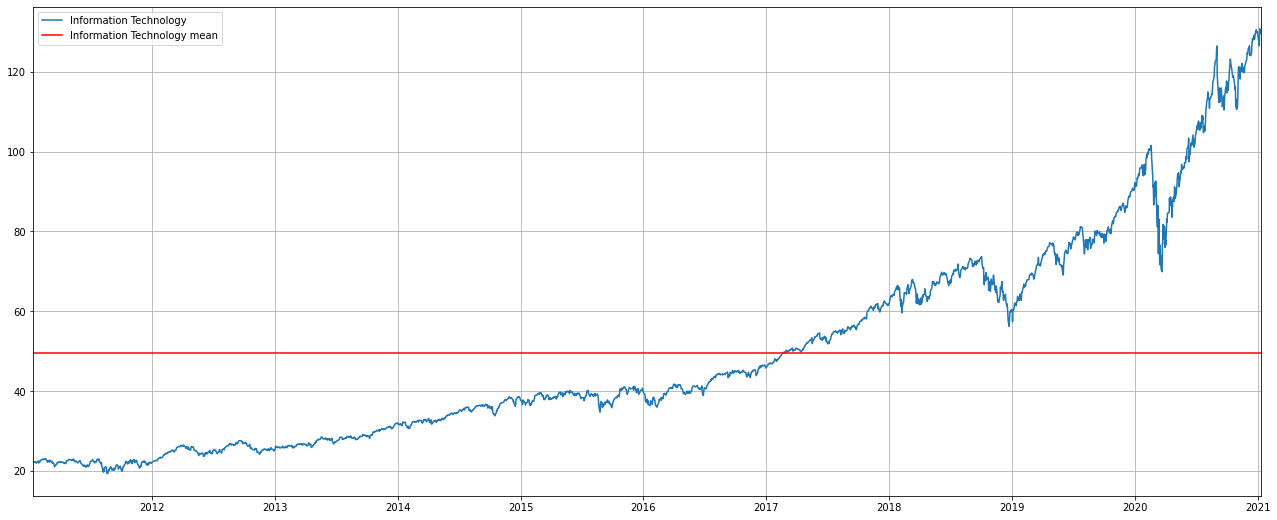

In [72]:
fig = plt.figure(figsize = (22,9))
plt.plot(data['Information Technology'], label = 'Information Technology')
plt.axhline(data['Information Technology'].mean(), label = 'Information Technology mean', color= 'red')
plt.legend(loc = 'best')
plt.autoscale(axis = 'x', tight = True)
plt.grid(True)

Note that the mean does not look representative of all the data. This is so because prices are not stationary, and the lack of stationarity invalidates all statistical analysis.

How do we fix that? Using retuns.

We can calculate returns as  $R_t =  (P_t / P_{t-1})-1$.

In [73]:
Ret_data = data.pct_change().round(4).dropna()
Ret_data

Energy  Materials  Industrials  Utilities  Healthcare  Financials  \
Date                                                                            
2011-01-13 -0.0025    -0.0074       0.0004    -0.0012     -0.0043      0.0061   
2011-01-14  0.0128    -0.0028       0.0045     0.0051      0.0009      0.0128   
2011-01-18  0.0079     0.0078       0.0070     0.0032      0.0040      0.0000   
2011-01-19 -0.0115    -0.0259      -0.0122    -0.0024     -0.0069     -0.0130   
2011-01-20 -0.0069    -0.0149      -0.0051     0.0042      0.0018     -0.0013   
...            ...        ...          ...        ...         ...         ...   
2021-01-05  0.0434     0.0281       0.0103    -0.0007      0.0060      0.0065   
2021-01-06  0.0321     0.0417       0.0199     0.0261      0.0140      0.0353   
2021-01-07  0.0151     0.0094       0.0102    -0.0136      0.0165      0.0123   
2021-01-08 -0.0032    -0.0057       0.0012     0.0082      0.0026      0.0009   
2021-01-11  0.0172    -0.0008      -0.0040    -0.0093      0.0065     -0.0043   

            Consumer Discretionary  Consumer Staples  Information Technology  \
Date                                                                           
2011-01-13                  0.0004           -0.0018                 -0.0008   
2011-01-14                  0.0068            0.0033                  0.0089   
2011-01-18                  0.0044            0.0037                  0.0011   
2011-01-19                 -0.0102           -0.0023                 -0.0073   
2011-01-20                 -0.0041           -0.0050                 -0.0054   
...                            ...               ...                     ...   
2021-01-05                  0.0085            0.0021                  0.0065   
2021-01-06                  0.0089           -0.0012                 -0.0172   
2021-01-07                  0.0132           -0.0036                  0.0270   
2021-01-08                  0.0207            0.0050                  0.0065   
2021-01-11                 -0.0182           -0.0136                 -0.0083   

            Communication Services  Real Estate    Gold  iShares IG Corp  \
Date                                                                       
2011-01-13                  0.0030       0.0029 -0.0096           0.0043   
2011-01-14                 -0.0041       0.0068 -0.0097          -0.0048   
2011-01-18                 -0.0082       0.0094  0.0045          -0.0006   
2011-01-19                 -0.0099      -0.0119  0.0022          -0.0007   
2011-01-20                 -0.0030      -0.0021 -0.0194          -0.0043   
...                            ...          ...     ...              ...   
2021-01-05                  0.0052      -0.0001  0.0022          -0.0032   
2021-01-06                 -0.0004      -0.0005 -0.0156          -0.0081   
2021-01-07                  0.0151      -0.0001 -0.0033          -0.0001   
2021-01-08                  0.0037       0.0097 -0.0334          -0.0007   
2021-01-11                 -0.0130      -0.0141 -0.0028          -0.0043   

            iShares HY Corp  
Date                         
2011-01-13          -0.0002  
2011-01-14           0.0016  
2011-01-18          -0.0001  
2011-01-19          -0.0031  
2011-01-20          -0.0020  
...                     ...  
2021-01-05           0.0003  
2021-01-06          -0.0018  
2021-01-07           0.0029  
2021-01-08           0.0015  
2021-01-11          -0.0054  

[2515 rows x 14 columns]

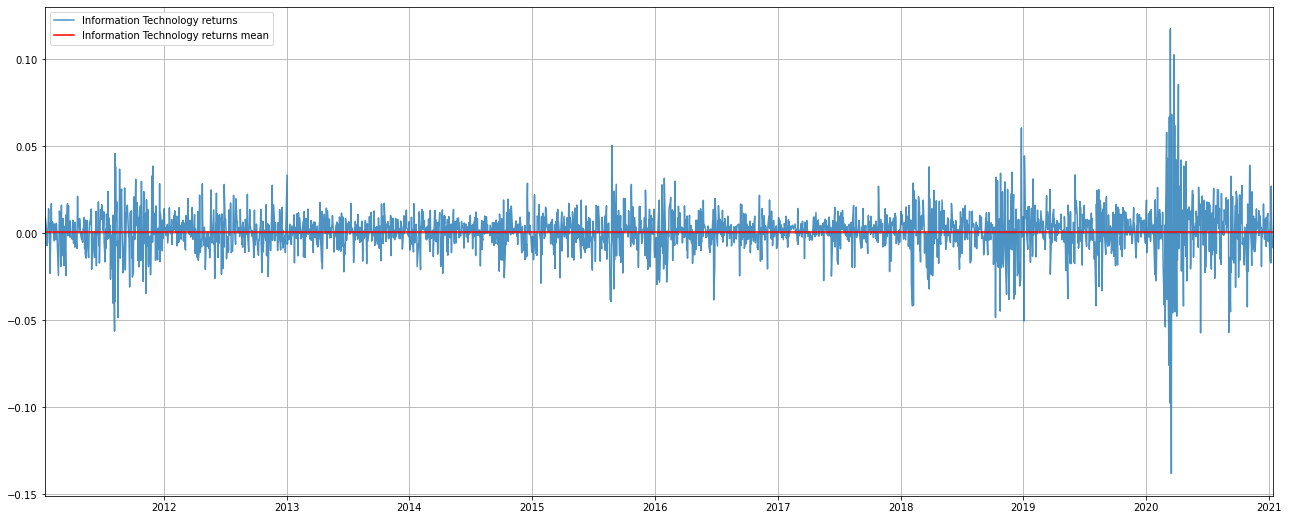

In [74]:
fig = plt.figure(figsize = (22,9))
plt.plot(Ret_data['Information Technology'], label = 'Information Technology returns', alpha = 0.8)
plt.axhline(Ret_data['Information Technology'].mean(), label = 'Information Technology returns mean', color= 'red')
plt.legend(loc = 'best')
plt.autoscale(axis = 'x', tight = True)
plt.grid(True)

Now it looks like it has a constant mean.

Besides, we can analyse if they can be considered as normally distributed by observing their histograms and some other statistics, particularly Skewness and Kurtosis.

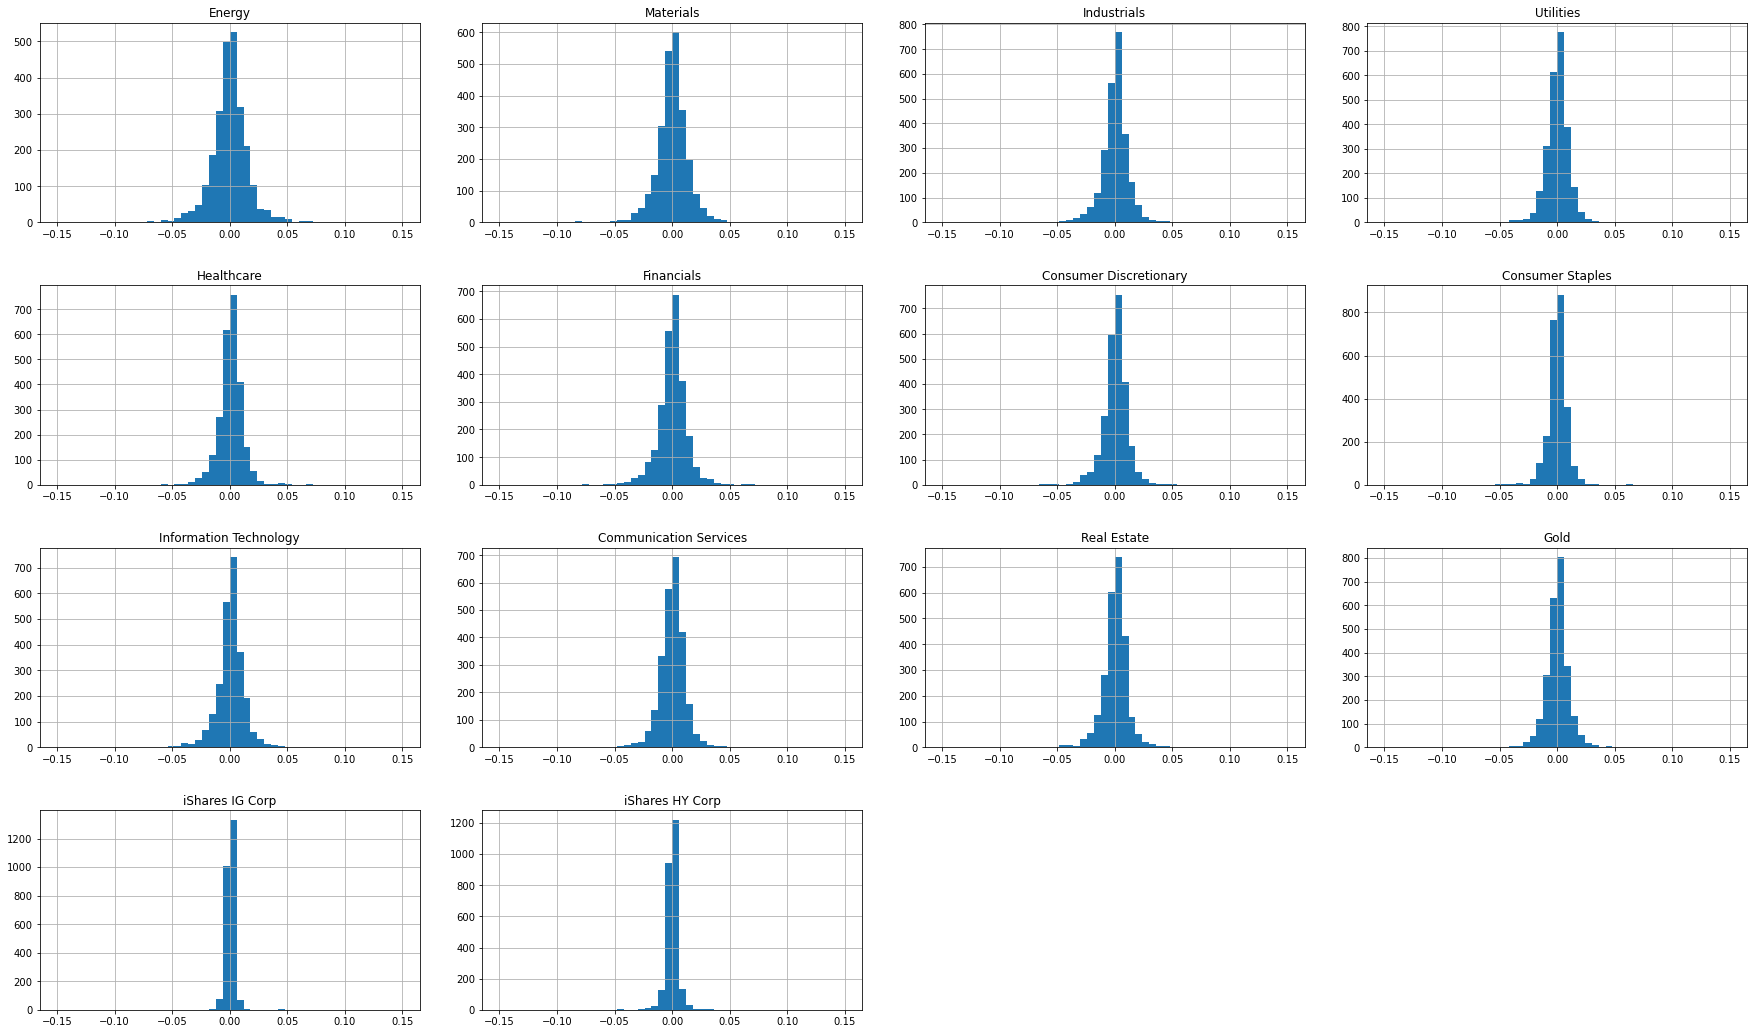

In [78]:
fig = plt.figure(figsize = (25,15))
for i in range(len(Ret_data.columns)):
    plt.subplot(4,4,i+1)
    plt.hist(Ret_data[Ret_data.columns[i]], bins = 50, range = (-0.15, 0.15))
    plt.title(Ret_data.columns[i])
    plt.grid(True)
plt.tight_layout(pad=3.0)

In [79]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray object to generate statistics on
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))
    
    
def normality_test(array):
    
    print("Skew of data set %14.3f" % scs.skew(array))
    print("Skew test p-value %14.3f" % scs.skewtest(array)[1])
    print("Kurt of data set %14.3f" % scs.kurtosis(array))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(array)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(array)[1])

In [80]:
tickers_labels

['Energy',
 'Materials',
 'Industrials',
 'Utilities',
 'Healthcare',
 'Financials',
 'Consumer Discretionary',
 'Consumer Staples',
 'Information Technology',
 'Communication Services',
 'Real Estate',
 'Gold',
 'iShares IG Corp',
 'iShares HY Corp']

In [81]:
for ticker in tickers_labels:
    print("\nResults for symbol: %s" % ticker)
    print(30 * "-")
    returns = np.array(Ret_data[ticker])
    print_statistics(returns)


Results for symbol: Energy
------------------------------
     statistic           value
------------------------------
          size      2515.00000
           min        -0.20660
           max         0.16090
          mean         0.00004
           std         0.01765
          skew        -0.51877
      kurtosis        17.32220

Results for symbol: Materials
------------------------------
     statistic           value
------------------------------
          size      2515.00000
           min        -0.10450
           max         0.11190
          mean         0.00034
           std         0.01412
          skew        -0.43581
      kurtosis         7.66268

Results for symbol: Industrials
------------------------------
     statistic           value
------------------------------
          size      2515.00000
           min        -0.12450
           max         0.12320
          mean         0.00057
           std         0.01249
          skew        -0.48168
      kur

 The kurtosis values seem to be especially far from normal for all four data sets. We can also perform some normality tests.

In [82]:
for ticker in tickers_labels:
    print("\nResults for symbol %s" % ticker)
    print(30 * "-")
    returns = np.array(Ret_data[ticker])
    normality_test(returns)


Results for symbol Energy
------------------------------
Skew of data set         -0.519
Skew test p-value          0.000
Kurt of data set         17.322
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol Materials
------------------------------
Skew of data set         -0.436
Skew test p-value          0.000
Kurt of data set          7.663
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol Industrials
------------------------------
Skew of data set         -0.482
Skew test p-value          0.000
Kurt of data set         13.688
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol Utilities
------------------------------
Skew of data set         -0.071
Skew test p-value          0.147
Kurt of data set         19.910
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol Healthcare
------------------------------
Skew of data set         -0.331
Skew test p

 The above tests have normality as null hypothesis. Thus, normality is rejected for all of our data sets.

We can also study normality by generating normal random variables with mean and standard deviation equal to those of our sample data and comparing the theoretical distribution with the observed one.

Let's perform that excercise for the Communication Services serie, which has a mean of 0.00042 and a standard deviation of 0.01137.

In [83]:
mu, sigma = 0.00042, 0.01137

CS_normal = np.random.normal(mu, sigma, 2490)

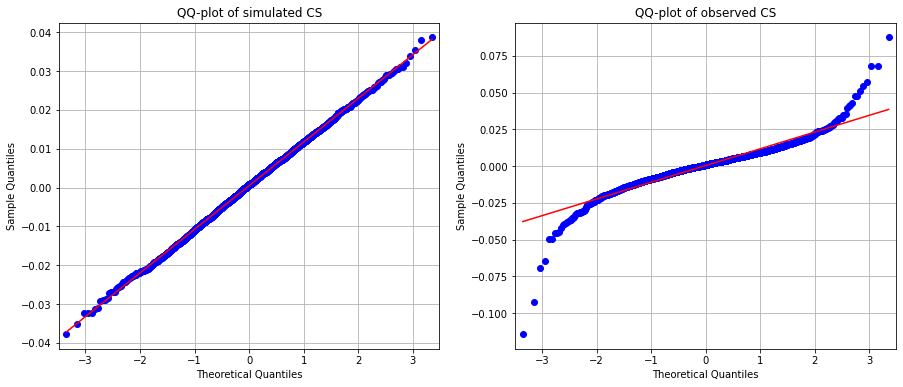

In [84]:
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1, 2, 1)

sm.qqplot(CS_normal, line = 's', ax = ax)
plt.title('QQ-plot of simulated CS')
plt.grid(True)

ax = fig.add_subplot(1, 2, 2)
sm.qqplot(Ret_data['Communication Services'], line = 's', ax = ax)
plt.title('QQ-plot of observed CS')
plt.grid(True)

Text(0.5, 1.0, 'Histograms of simulated normal data and observed data')

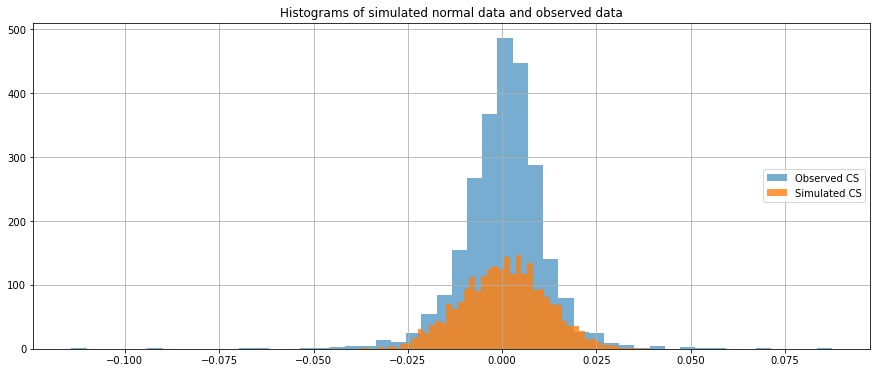

In [85]:
fig = plt.figure(figsize = (15,6))
plt.hist(Ret_data['Communication Services'], bins = 50,  label = 'Observed CS', alpha = 0.6)
plt.grid(True)
plt.hist(CS_normal, bins = 50, label = 'Simulated CS', alpha = 0.8)
plt.grid(True)
plt.legend(loc = 'center right')
plt.title('Histograms of simulated normal data and observed data')

Even though normality does not hold, we will asume so in the rest of the analysis. Let's now generate the data we need.

In [86]:
#noa = number of assets

noa = len(tickers_labels)
rets = data.pct_change().round(4).dropna()
rets_mean = rets.mean() * 252
sigma = rets.cov() * 252

weights = rand_weights(noa)

In [87]:
weights = np.zeros((2000,noa))
for i in range(len(weights)):
    weights[i] = rand_weights(noa)
    
pret= portf_mean(weights, rets_mean)
pvol = np.sqrt(portf_var(weights, sigma))

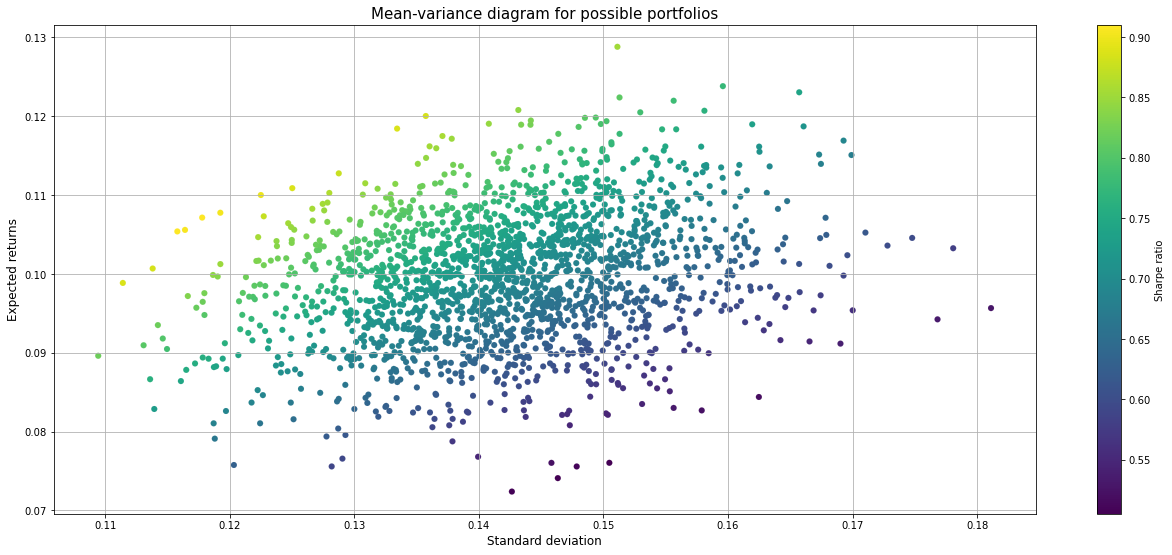

In [88]:
fig = plt.figure(figsize = (22,9))          
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol)
plt.grid(True)
plt.title('Mean-variance diagram for possible portfolios', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label = 'Sharpe ratio')

## Portfolio Optimizations

To make our lives a bit easier, first we have a convenience function giving back the major portfolio statistics for an input weights vector/array.

The derivation of the optimal portfolios is a constrained optimization problem for which  we  use  the  function  minimize  from  the  **scipy.optimize**  sublibrary.

In [89]:
def statistics(weights):
    '''
    Esta funcion nos devuelve el retorno medio (pret), la desviacion estandard (pvol) y Sharpe ratio del portafolio (pret/pvol)
    con determinados weights en cada activo.
    '''
    
    weights = np.array(weights) 
    pret = np.sum(rets_mean * weights)
    pvol = np.sqrt(np.dot(weights.T, np.dot(sigma, weights)))
    
    return np.array([pret, pvol, pret / pvol])

The minimization function minimize is quite general and allows for (in)equality constraints and bounds for the parameters. 

#### Let us start with the maximization of the Sharpe ratio. Formally, we minimize the negative value of the Sharpe ratio:

In [90]:
def min_func_sharpe(weights):    
    '''
    Esta funcion nos devuelve el negativo del Sharpe ratio. Por qué negativo? Porque vamos a usar la función 'minimize', 
     y como queremos maximizar el ratio, tambien podemos minimizar su opuesto.
    '''
    return -statistics(weights)[2]

The constraint is that all parameters (weights) add up to 1. This can be formulated as follows using the conventions of the  minimize function

In [91]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

We also bound the parameter values (weights) to be within 0 and 1. These values are provided to the minimization function as a tuple of tuples in this case:

In [92]:
bnds = tuple((0, 1) for x in range(noa))

The only input that is missing for a call of the optimization function is a starting parameter list (initial guesses for the weights). We simply use an equal distribution.

Calling the function returns not only optimal parameter values, but much more. We store the results in an object we call opts.

In [93]:
'''
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize.html

La funcion minimize tiene como argumento: 
    *la funcion a minimizar, 
    *un vector de inicial guesses, 
    *el algoritmo optimizador, 
    *los limites de las variables, y 
    *las restricciones de la optimizacion 

Buscamos el portafolio con maximo Sharpe ratio
'''

opts = sco.minimize(min_func_sharpe, noa * [1. / noa], method='SLSQP',bounds=bnds, constraints=cons) 

print(opts)

     fun: -1.2417670597688022
     jac: array([ 2.19185407e+00,  1.15707877e+00,  4.11312103e-01,  1.49593696e-01,
       -3.14965844e-04,  1.11416931e+00,  3.13249961e-01,  2.24074438e-01,
       -6.13048673e-04,  6.20569348e-01,  9.47322085e-01,  4.76568937e-04,
        2.27302313e-04,  2.65236691e-01])
 message: 'Optimization terminated successfully'
    nfev: 153
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.        , 0.        , 0.        , 0.        , 0.1917776 ,
       0.        , 0.        , 0.        , 0.15380327, 0.        ,
       0.        , 0.0238645 , 0.63055463, 0.        ])


Our main interest lies in getting the optimal portfolio composition. 

To this end, we access the results object by providing the key of interest—i.e., x in our case. 

The optimization yields a portfolio that only consists of three out of the five assets:

In [94]:
print(tickers_labels)
opts['x'].round(3)

['Energy', 'Materials', 'Industrials', 'Utilities', 'Healthcare', 'Financials', 'Consumer Discretionary', 'Consumer Staples', 'Information Technology', 'Communication Services', 'Real Estate', 'Gold', 'iShares IG Corp', 'iShares HY Corp']


array([0.   , 0.   , 0.   , 0.   , 0.192, 0.   , 0.   , 0.   , 0.154,
       0.   , 0.   , 0.024, 0.631, 0.   ])

In [95]:
opt_weights = pd.DataFrame(columns = ['Max Sharpe Ratio'], index= tickers_labels)
opt_weights['Max Sharpe Ratio'] = opts['x'].round(3)
opt_weights

Max Sharpe Ratio
Energy                             0.000
Materials                          0.000
Industrials                        0.000
Utilities                          0.000
Healthcare                         0.192
Financials                         0.000
Consumer Discretionary             0.000
Consumer Staples                   0.000
Information Technology             0.154
Communication Services             0.000
Real Estate                        0.000
Gold                               0.024
iShares IG Corp                    0.631
iShares HY Corp                    0.000

Using the portfolio weights from the optimization, the following statistics emerge:

In [96]:
statistics(noa * [1. / noa]).round(3)

array([0.1  , 0.141, 0.706])

In [97]:
statistics(opts['x']).round(3)

array([0.1  , 0.081, 1.242])

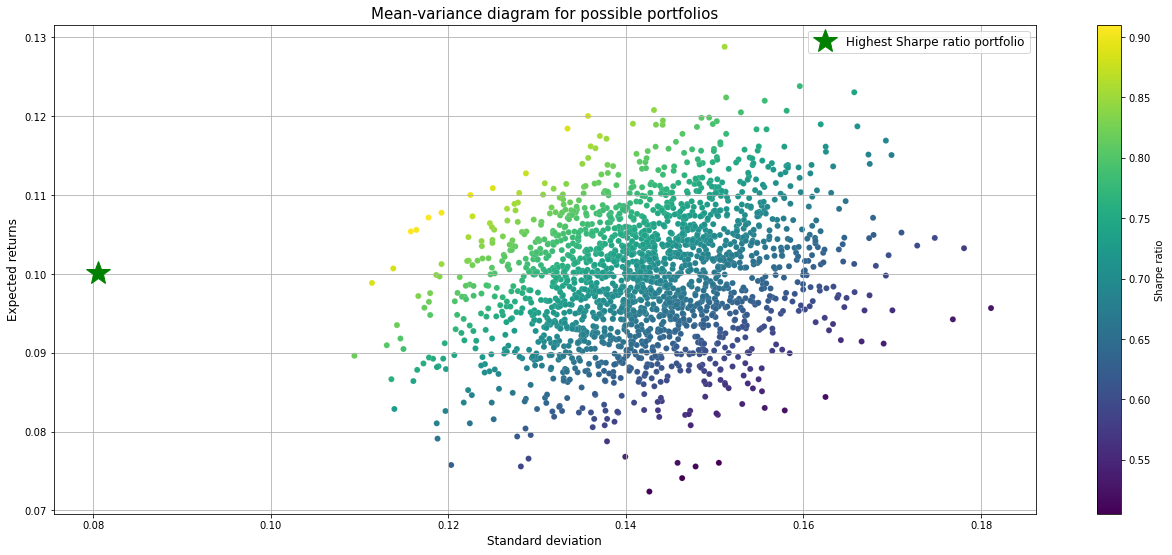

In [98]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol, edgecolors='w')

# portfolio with highest Sharpe ratio

plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'g*', markersize=25.0, label='Highest Sharpe ratio portfolio')


plt.grid(True)
plt.title('Mean-variance diagram for possible portfolios', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=12, loc = 'best')

#### Next, let us minimize the variance of the portfolio.

In [99]:
def min_func_variance(weights):   
    '''
    Esta funcion nos devuelve la varianza
    
    '''
    return statistics(weights)[1]**2

In [100]:
'''
Buscamos el portafolio con minima varianza
'''

optv = sco.minimize(min_func_variance, noa * [1. / noa,],method='SLSQP', bounds=bnds,constraints=cons)
print(tickers_labels)
optv['x'].round(3)

['Energy', 'Materials', 'Industrials', 'Utilities', 'Healthcare', 'Financials', 'Consumer Discretionary', 'Consumer Staples', 'Information Technology', 'Communication Services', 'Real Estate', 'Gold', 'iShares IG Corp', 'iShares HY Corp']


array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.026, 0.   ,
       0.   , 0.   , 0.063, 0.566, 0.345])

In [101]:
opt_weights['Min Variance'] = optv['x'].round(3)
opt_weights

Max Sharpe Ratio  Min Variance
Energy                             0.000         0.000
Materials                          0.000         0.000
Industrials                        0.000         0.000
Utilities                          0.000         0.000
Healthcare                         0.192         0.000
Financials                         0.000         0.000
Consumer Discretionary             0.000         0.000
Consumer Staples                   0.000         0.026
Information Technology             0.154         0.000
Communication Services             0.000         0.000
Real Estate                        0.000         0.000
Gold                               0.024         0.063
iShares IG Corp                    0.631         0.566
iShares HY Corp                    0.000         0.345

We can further add another possible portfolios: **the Naive Portfolio**

In [102]:
np.array(noa * [1. / noa])

array([0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.07142857, 0.07142857, 0.07142857])

In [105]:
print(tickers_labels)
naive = np.array(noa * [1. / noa])

print(np.sum(naive).round())

ms_prets = np.sum(rets.mean() * naive) * 252


ms_vols = np.sqrt(np.dot(naive.T, np.dot(rets.cov() * 252, naive)))

['Energy', 'Materials', 'Industrials', 'Utilities', 'Healthcare', 'Financials', 'Consumer Discretionary', 'Consumer Staples', 'Information Technology', 'Communication Services', 'Real Estate', 'Gold', 'iShares IG Corp', 'iShares HY Corp']
1.0


In [106]:
opt_weights['Naive'] = naive

opt_weights

Max Sharpe Ratio  Min Variance     Naive
Energy                             0.000         0.000  0.071429
Materials                          0.000         0.000  0.071429
Industrials                        0.000         0.000  0.071429
Utilities                          0.000         0.000  0.071429
Healthcare                         0.192         0.000  0.071429
Financials                         0.000         0.000  0.071429
Consumer Discretionary             0.000         0.000  0.071429
Consumer Staples                   0.000         0.026  0.071429
Information Technology             0.154         0.000  0.071429
Communication Services             0.000         0.000  0.071429
Real Estate                        0.000         0.000  0.071429
Gold                               0.024         0.063  0.071429
iShares IG Corp                    0.631         0.566  0.071429
iShares HY Corp                    0.000         0.345  0.071429

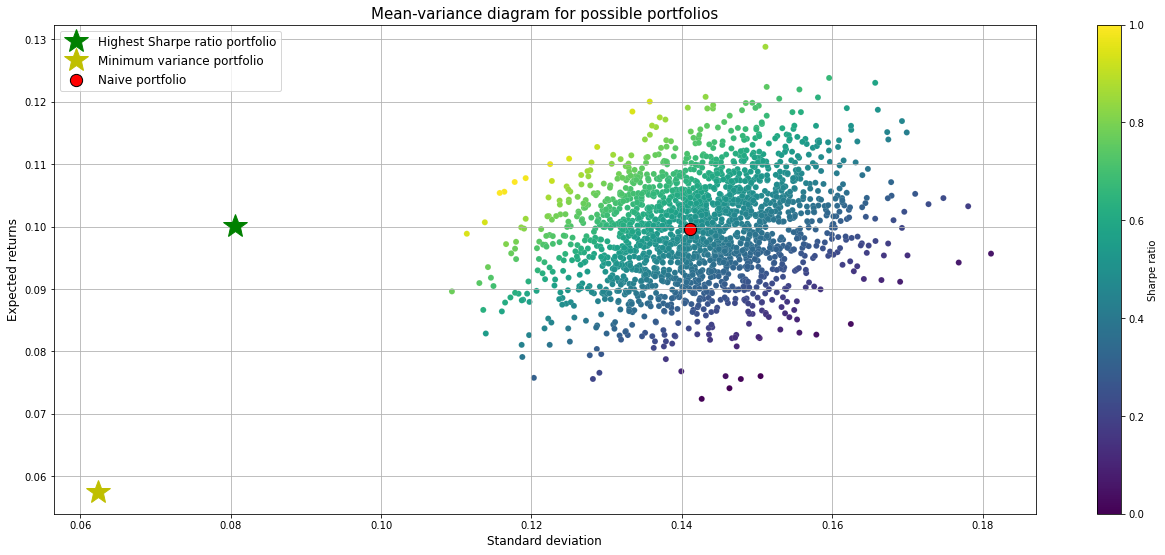

In [107]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol, edgecolors='w')

# portfolio with highest Sharpe ratio

plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'g*', markersize=25.0, label='Highest Sharpe ratio portfolio')

# minimum variance portfolio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],'y*', markersize=25.0, label='Minimum variance portfolio')


plt.scatter(ms_vols, ms_prets, c='red', s=150, marker='o',label='Naive portfolio', edgecolors='black')

plt.grid(True)
plt.title('Mean-variance diagram for possible portfolios', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=12, loc = 'best')

## Efficient frontier

The derivation of all optimal portfolios—i.e., all portfolios with minimum volatility for a given **target return level** (or all portfolios with maximum return for a given risk level)
—is similar to the previous optimizations. 

The only difference is that we have to iterate over multiple starting conditions. 

The approach we take is that we fix a target return level and derive for each such level those portfolio weights that lead to the minimum volatility value. 

For the optimization, this leads to two conditions: 
+ one for the target return level  *tret*,
+ and one for the sum of the portfolio weights as before.

The boundary values for each parameter stay the same.

For clarity, we define a dedicated function min_func for use in the minimization procedure. It merely returns the volatility value from the  statistics function.

In [108]:
con1 = {'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}
con2 = {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}
bnds = tuple((0, 1) for x in range(noa))

def min_func_port(w):
    '''
    Devuelve la desviacion estandar
    '''  
    return statistics(w)[1]

In [109]:
'''En el diagrama volatilidad - retornos esperados, trets seria el eje vertical. 
Para cada valor de retorno esperado, queremos hallar la minima volatilidad.'''

trets = np.linspace(0.01, 0.18, 100)
tvols = []

ef_we = []

'''
Llevamos a cabo la minimizacion reiteradas veces, para cada valor en trets, buscamos la mínima varianza. 
    tvols guarda la minima volatilidad para cada tret
    ef_we guarda los weights optimos para cada par (tret, tvol)
'''

for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}, {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',  bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
    ef_we.append(res['x'].round(3))
       
tvols = np.array(tvols)

ind = np.argmin(tvols) # Solo nos importa la parte eficiente de la frontera
tvols = tvols[ind:]
trets = trets[ind:]

In [110]:
ef_w = pd.DataFrame(ef_we,columns=tickers_labels)
ef_w.tail()

Energy  Materials  Industrials  Utilities  Healthcare  Financials  \
95     0.0        0.0          0.0        0.0       0.294         0.0   
96     0.0        0.0          0.0        0.0       0.296         0.0   
97     0.0        0.0          0.0        0.0       0.298         0.0   
98     0.0        0.0          0.0        0.0       0.301         0.0   
99     0.0        0.0          0.0        0.0       0.303         0.0   

    Consumer Discretionary  Consumer Staples  Information Technology  \
95                     0.0               0.0                   0.598   
96                     0.0               0.0                   0.608   
97                     0.0               0.0                   0.619   
98                     0.0               0.0                   0.629   
99                     0.0               0.0                   0.640   

    Communication Services  Real Estate  Gold  iShares IG Corp  \
95                     0.0          0.0   0.0            0.109   
96                     0.0          0.0   0.0            0.096   
97                     0.0          0.0   0.0            0.083   
98                     0.0          0.0   0.0            0.070   
99                     0.0          0.0   0.0            0.057   

    iShares HY Corp  
95              0.0  
96              0.0  
97              0.0  
98              0.0  
99              0.0

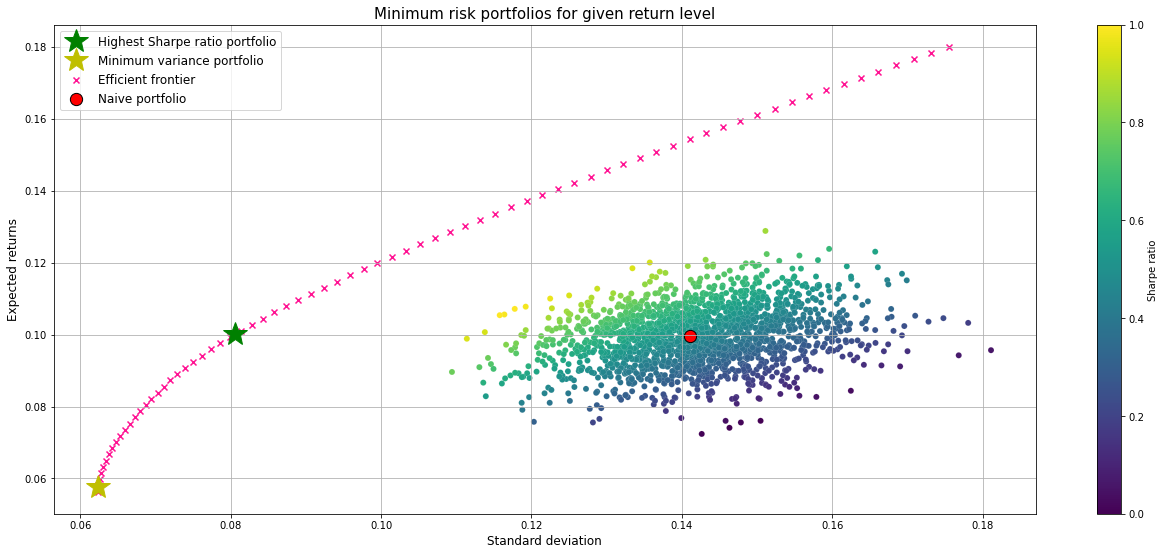

In [111]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol, edgecolors='w')

# efficient frontier
plt.scatter(tvols, trets, c = 'deeppink', marker='x', label='Efficient frontier', edgecolors='black')

# portfolio with highest Sharpe ratio

plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'g*', markersize=25.0, label='Highest Sharpe ratio portfolio')

# minimum variance portfolio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],'y*', markersize=25.0, label='Minimum variance portfolio')


plt.scatter(ms_vols, ms_prets, c='red', s=150, marker='o',label='Naive portfolio', edgecolors='black')

plt.grid(True)
plt.title('Minimum risk portfolios for given return level', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=12, loc = 'best')

Note that the point cloud does not aproach much to the efficient frontier. 

That's because the optimal weights that generate the frontier are extreme weights, i.e. combination of only few assets. 

This is hardly randomly generated. Thus, we are goinig to create those extreme weights in order to expand the cloud pf pairs values.

#### Extreme Weights:

#### 1. Weights on only a few assets: multiplying the generated weights by a vector of 0 and 1 (and normalizing)

#### 2. Weight on only one asset: identity matrix

#### 3. Optimal weights

In [112]:
rand_weights(noa)*np.random.randint(2, size=(noa))

array([0.12101829, 0.09818317, 0.04580786, 0.00074895, 0.00215771,
       0.        , 0.        , 0.12703838, 0.        , 0.        ,
       0.        , 0.05737383, 0.00748184, 0.        ])

In [113]:
def extreme_weights(noa):
    
    '''
    Una forma de crear weights extremos es conseguir un vector de peso en donde algunos activos
    tengan w=0. Para eso usamos random.randint(0,2) que devuelve un vector de 0 y 1.
    '''
    
    ew = rand_weights(noa)*np.random.randint(2, size=(noa))
    np.seterr(divide='ignore', invalid='ignore')
    
    return ew / sum(ew)

In [114]:
# Generamos 10000 de esos pesos extremos
ex_weights = np.zeros((10000,noa))

for i in range(len(ex_weights)):
    ex_weights[i] = extreme_weights(noa)

In [115]:
new_weights = np.concatenate((weights, ex_weights, np.identity(noa), ef_we))

In [116]:
pret= portf_mean(new_weights, rets_mean)
pvol = np.sqrt(portf_var(new_weights, sigma))

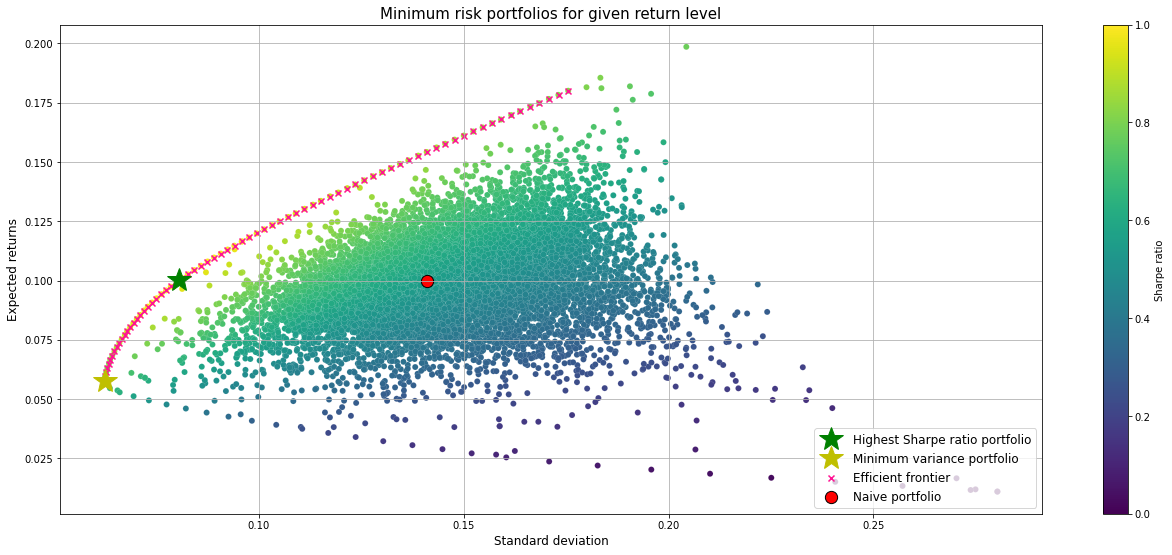

In [117]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = pret/pvol, edgecolors='w')

# efficient frontier
plt.scatter(tvols, trets, c = 'deeppink', marker='x', label='Efficient frontier', edgecolors='black')

# portfolio with highest Sharpe ratio

plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'g*', markersize=25.0, label='Highest Sharpe ratio portfolio')

# minimum variance portfolio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],'y*', markersize=25.0, label='Minimum variance portfolio')


plt.scatter(ms_vols, ms_prets, c='red', s=150, marker='o',label='Naive portfolio', edgecolors='black')

plt.grid(True)
plt.title('Minimum risk portfolios for given return level', fontsize = 15)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=12, loc = 'lower right')

## Capital Allocation Line

In addition to risky securities like stocks or commodities, there is in general one universal riskless investment opportunity available: *cash or cash accounts*.

In an idealized world, money held in a cash account with a large bank can be considered riskless (e.g., through public deposit insurance schemes). 

The downside is that such a riskless investment generally yields only a small return, sometimes close to zero.

However, taking into account such a riskless asset enhances the efficient investment opportunity set for investors considerably. 

The basic idea is that investors first determine an efficient portfolio of risky assets and then add the riskless asset to the mix. 

By adjusting the proportion of the investor’s wealth to be invested in the riskless asset it is possible to achieve any risk-return profile that lies on the straight line (in the risk-return space) between the riskless asset and the efficient portfolio.

Let's now assume that the investors porfolio is formed with a proportion $p$ of risky assets which yields a return $R_x$ and $(1-p)$ of the riskless asset whose return $R_f$ is not a random variable. The new porfolio characteristics will then be:

$$ R_p = pR_x + (1 - p)R_f $$

$$ E(R_p) = p E(R_x) + (1-p)R_f = R_f + (E(R_x) - R_f)p$$

$$ \sigma^2_p = p^2\sigma^2_x$$

Thus **the allocation line** will be:

$$ E(R_p) = R_f +\dfrac{(E(R_x) -R_f)}{\sigma_x}\sigma_p$$
$$ E(R_p) = R_f +S_x \sigma_p$$

The investor may combine the risk-free asset with any portfolio of risky asset available, which gives rise to many straight lines in the mean-variance diagram. 

But among all the efficient portfolios, all investor will choose one that achieves the best mean-variance pair, that is the **tangency porfolio**. 

That portfolio is the one that maximizes the Sharpe Ratio.

In order to find the capital allocation line we need to carry a spline interpolation of the efficient frontier. The following code selects exactly these portfolios from our previously used sets tvols and trets.

In [118]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

The new ndarray objects *evols* and *erets* are used for the interpolation:

In [119]:
tck = sci.splrep(evols, erets)

Via this numerical route we end up being able to define a continuos function f(x) for the efficient frontier:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html

In [120]:
def g(x):
    '''
    Funcion de la frontera eficiente (splines approximation) 
    g(x) devuelve un vector de valores que representan la funcion evaluada en los puntos x
    '''
    return sci.splev(x, tck, der = 0)

In [121]:
#Supongamos una risk free rate de 0.01
Rf = 0.01

# Encontramos el Sharpe ratio para cada par (volatilidad, retorno esperado)
Sp = []
for sigma, mu in zip(evols, erets):
     Sp.append((mu - Rf)/sigma)

In [127]:
# La capital market line es la linea que parte de la tasa libre de riesgo y es tangente a la frontera eficiente. 
# La pendiente de la linea tangente es el maximo Sharpe ratio.

# La definimos asi siguiendo esa definicion:

sigma_T = np.linspace(0.0, 0.15)
E_T = Rf + max(Sp)*sigma_T

TP = np.argmax((erets-Rf)/evols) #Indice del portafolio de tangencia

Text(0.5, 1.0, 'Capital allocation line and tangency portfolio')

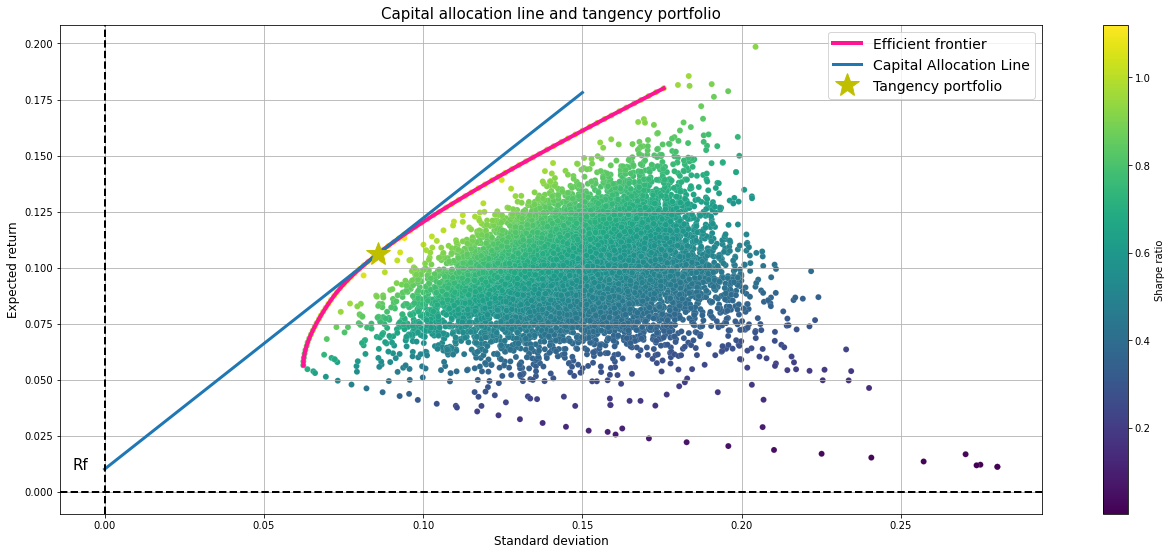

In [128]:
plt.figure(figsize=(22,9))

# random portfolio composition
plt.scatter(pvol, pret, marker= 'o', lw = 0.1, c = (pret-Rf)/pvol, edgecolors='w')

# efficient frontier
plt.plot(evols, erets, 'deeppink', lw=4, label='Efficient frontier')

# capital allocation line
plt.plot(sigma_T, E_T, lw = 3, label= 'Capital Allocation Line')

# tangency portfolio
plt.plot(evols[TP], erets[TP], 'y*', markersize=25.0, label='Tangency portfolio')

# risk free rate
plt.text(-0.01, Rf, 'Rf', fontsize = 15)

plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected return', fontsize = 12)
plt.colorbar(label='Sharpe ratio')
plt.legend(fontsize=14)
plt.title('Capital allocation line and tangency portfolio', fontsize = 15)

The portfolio weights of the tangent portfolio are as follows. 

In [129]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - erets[TP]}, 
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',bounds=bnds, constraints=cons)

In [130]:
keys = tickers_labels
values = res['x'].round(4)
res = {keys[i]: values[i] for i in range(len(keys))} 
res

{'Energy': 0.0539,
 'Materials': 0.0689,
 'Industrials': 0.0799,
 'Utilities': 0.0748,
 'Healthcare': 0.0841,
 'Financials': 0.0688,
 'Consumer Discretionary': 0.0793,
 'Consumer Staples': 0.0708,
 'Information Technology': 0.091,
 'Communication Services': 0.0725,
 'Real Estate': 0.0706,
 'Gold': 0.0593,
 'iShares IG Corp': 0.0634,
 'iShares HY Corp': 0.0627}

# Capital Asset Pricing Model (CAPM)

----

The capital asset pricing model (CAPM) is a center-piece of modern financial economics. The model gives us a precise prediction of the relationship that we should observe between the risk of an asset and its expected return. This relationship provides a benchmark rate of return for evaluating possible investments and helps us to make an educated guess as to the expected return on assets that have not yet been traded in the marketplace.

The CAMP asks what would happen if all inverstors optimized their portfolios *a la Markowitz*. That is, if each inversor used the same input list (expected return and standard deviation) to draw an efficient frontier and had access to the same risk free rate asset, and they were all rational investors, they would all choose the same set of weights for each risky asset. 


### Market equilibrium

Consider the stock of company A and let $\omega_A$ denote the weight of this company in the market porfolio. Let $Q_i$ denote the amount of money that investor $i$ wants to put in the market porfolio. Total demand for A will be:

$$\omega_A \sum_{i=1}^I Q_i$$

The market will be in equilibrium when the total demand equals supply, i.e. if stocks are available in the market in the same amount demanded by investors. In other words, in equilibrium, the weight of each risky asset in the market (the market value of the stock divided by the sum of the market value of all stocks), equalls the weight of that asset in the tangency porfolio.
Therefore, the capital allocation line based on each investor's optimal risky porfolio will in fact also be the **capital *market* line** and the **market portfolio** is then equal to the tangency porfolio. 

Under those assumptions, we could find the tangency porfolio simply by looking at the fraction of the market that each stock represents.

Text(0.5, 1.0, 'Capital market line and tangency portfolio')

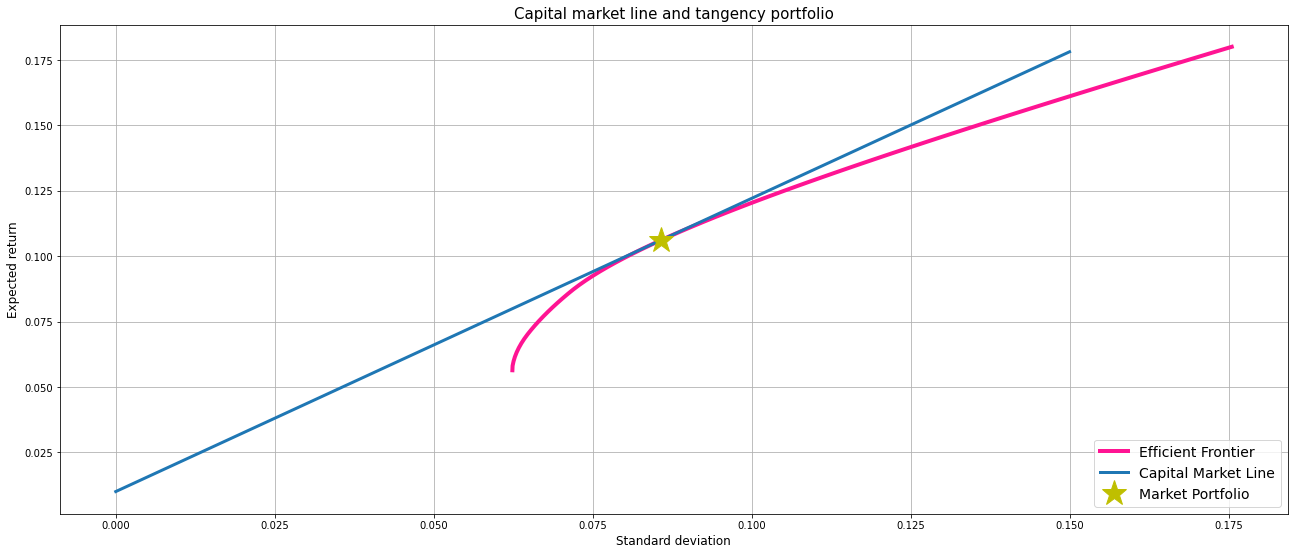

In [131]:
plt.figure(figsize=(22,9))


# efficient frontier
plt.plot(evols, erets, 'deeppink', lw=4, label='Efficient Frontier')

# capital allocation line
plt.plot(sigma_T, E_T, lw = 3, label= 'Capital Market Line')

# tangency portfolio
plt.plot(evols[TP], erets[TP], 'y*', markersize=26, label='Market Portfolio')

plt.grid(True)
plt.xlabel('Standard deviation', fontsize = 12)
plt.ylabel('Expected return', fontsize = 12)
plt.legend(loc = 'lower right', fontsize = 14)
plt.title('Capital market line and tangency portfolio', fontsize = 15)

From the capital allocation line (after a few algebraic steps) we get that:

$$ E(R_j) = R_f +\dfrac{(E(R_T) -R_f)}{\sigma_p^2}cov(R_j, R_T)$$

If we now replace $R_T$ for the return of the market porfolio $R_M$, we get

$$ E(R_j) = R_f +\dfrac{(E(R_M) -R_f)}{\sigma_p^2}cov(R_j, R_M)$$

This relation is more commonly defined by introducing the asset's *beta*:

$$\beta_j = \dfrac{cov(R_j, R_M)}{\sigma_M^2}$$

Then:
$$ E(R_j) = R_f +\beta_j(E(R_M) -R_f)$$
or
$$ E(R_j) - R_f=  \beta_j(E(R_M) -R_f)$$

Which is the CAMP equation, and it gives us the equilibrium expected return on each asset as a function of its beta.

### What is beta?

Beta is the contribution of the asset j to the variance of the market porfolio. Note that if $\beta >1$, it implies that the asset is riskier than the market, and therefore the excess return of j should be higher. On the other hand,a $\beta < 1$ implies that the asset is less risky than the market, and the required excess return will also be lower.

The market itself has a $\beta = 1$, and the risk-free asset has a $\beta = 0$.

## Security Market Line

For each $\beta$, investors will demand a different reward (i.e. excess return). If we represent graphically the relationship between beta and expected excess return, we get the so call **security market line**.

In [133]:
# Let's find the market returns by using the optimal weights (note that we are assuming that 
#the choosen assets are the ones that make up for the whole market, which is not actually the case)

rets['Market'] = np.zeros(len(rets))
for i in range(len(rets)):
    rets.iloc[i, 14] = values.dot(rets.iloc[i, :14])

In [134]:
rets.head()

Energy  Materials  Industrials  Utilities  Healthcare  Financials  \
Date                                                                            
2011-01-13 -0.0025    -0.0074       0.0004    -0.0012     -0.0043      0.0061   
2011-01-14  0.0128    -0.0028       0.0045     0.0051      0.0009      0.0128   
2011-01-18  0.0079     0.0078       0.0070     0.0032      0.0040      0.0000   
2011-01-19 -0.0115    -0.0259      -0.0122    -0.0024     -0.0069     -0.0130   
2011-01-20 -0.0069    -0.0149      -0.0051     0.0042      0.0018     -0.0013   

            Consumer Discretionary  Consumer Staples  Information Technology  \
Date                                                                           
2011-01-13                  0.0004           -0.0018                 -0.0008   
2011-01-14                  0.0068            0.0033                  0.0089   
2011-01-18                  0.0044            0.0037                  0.0011   
2011-01-19                 -0.0102           -0.0023                 -0.0073   
2011-01-20                 -0.0041           -0.0050                 -0.0054   

            Communication Services  Real Estate    Gold  iShares IG Corp  \
Date                                                                       
2011-01-13                  0.0030       0.0029 -0.0096           0.0043   
2011-01-14                 -0.0041       0.0068 -0.0097          -0.0048   
2011-01-18                 -0.0082       0.0094  0.0045          -0.0006   
2011-01-19                 -0.0099      -0.0119  0.0022          -0.0007   
2011-01-20                 -0.0030      -0.0021 -0.0194          -0.0043   

            iShares HY Corp    Market  
Date                                   
2011-01-13          -0.0002 -0.000700  
2011-01-14           0.0016  0.003181  
2011-01-18          -0.0001  0.003101  
2011-01-19          -0.0031 -0.008336  
2011-01-20          -0.0020 -0.004515

In [135]:
rets_mean = rets.mean() * 252
sigma = rets.cov() * 252

In [136]:
sigma

Energy  Materials  Industrials  Utilities  \
Energy                  0.078545   0.049669     0.042918   0.023290   
Materials               0.049669   0.050209     0.039729   0.020849   
Industrials             0.042918   0.039729     0.039290   0.021213   
Utilities               0.023290   0.020849     0.021213   0.031520   
Healthcare              0.029196   0.027693     0.027564   0.017508   
Financials              0.047250   0.041761     0.039035   0.021626   
Consumer Discretionary  0.036378   0.033992     0.032671   0.018207   
Consumer Staples        0.022802   0.021334     0.020787   0.017079   
Information Technology  0.035588   0.034506     0.034388   0.019143   
Communication Services  0.031114   0.028264     0.027908   0.017892   
Real Estate             0.033350   0.030411     0.029840   0.026597   
Gold                    0.001927   0.003913    -0.000375   0.002906   
iShares IG Corp         0.001677   0.001537     0.001327   0.003127   
iShares HY Corp         0.015898   0.014146     0.012803   0.008901   
Market                  0.032099   0.028831     0.026967   0.018203   

                        Healthcare  Financials  Consumer Discretionary  \
Energy                    0.029196    0.047250                0.036378   
Materials                 0.027693    0.041761                0.033992   
Industrials               0.027564    0.039035                0.032671   
Utilities                 0.017508    0.021626                0.018207   
Healthcare                0.029736    0.028223                0.024720   
Financials                0.028223    0.048040                0.035443   
Consumer Discretionary    0.024720    0.035443                0.033401   
Consumer Staples          0.017386    0.022220                0.019444   
Information Technology    0.027824    0.034428                0.031641   
Communication Services    0.022317    0.029046                0.025917   
Real Estate               0.023014    0.031748                0.026751   
Gold                     -0.000392   -0.000598                0.000155   
iShares IG Corp           0.001022    0.001139                0.001683   
iShares HY Corp           0.009769    0.014250                0.011758   
Market                    0.021056    0.028634                0.024318   

                        Consumer Staples  Information Technology  \
Energy                          0.022802                0.035588   
Materials                       0.021334                0.034506   
Industrials                     0.020787                0.034388   
Utilities                       0.017079                0.019143   
Healthcare                      0.017386                0.027824   
Financials                      0.022220                0.034428   
Consumer Discretionary          0.019444                0.031641   
Consumer Staples                0.019914                0.020633   
Information Technology          0.020633                0.041756   
Communication Services          0.017345                0.029552   
Real Estate                     0.019411                0.026772   
Gold                            0.002052                0.000253   
iShares IG Corp                 0.001361                0.001767   
iShares HY Corp                 0.007734                0.012053   
Market                          0.016779                0.025869   

                        Communication Services  Real Estate      Gold  \
Energy                                0.031114     0.033350  0.001927   
Materials                             0.028264     0.030411  0.003913   
Industrials                           0.027908     0.029840 -0.000375   
Utilities                             0.017892     0.026597  0.002906   
Healthcare                            0.022317     0.023014 -0.000392   
Financials                            0.029046     0.031748 -0.000598   
Consumer Discretionary                0.025917     0.026751  0.000155   
Consumer Staples               

In [137]:
market_sigma = sigma.iloc[14,14]

In [138]:
beta = np.zeros(noa+1)

In [139]:
for i in range(len(beta)):
    beta[i] = sigma.iloc[14,i]/market_sigma

In [140]:
## Security Market Line

exp_ret = Rf + beta*(rets_mean[14]-Rf)

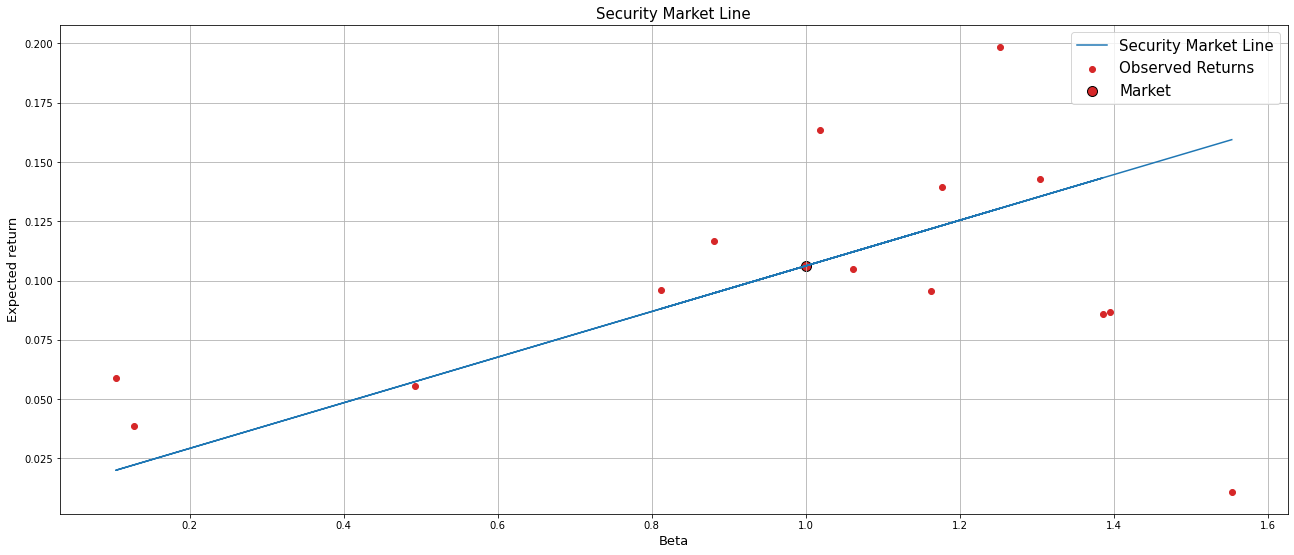

In [141]:
fig = plt.figure(figsize = (22,9))

plt.plot(beta, exp_ret, label = 'Security Market Line')
plt.scatter(beta, rets_mean, color = 'tab:red', label = 'Observed Returns')
plt.scatter(beta[-1], rets_mean[-1], color = 'tab:red', label = 'Market', edgecolors = 'black', s=100)

plt.legend(loc='best', fontsize = 15)
plt.xlabel('Beta', size = 13)
plt.ylabel('Expected return', size =13)
plt.title('Security Market Line', fontsize = 15)
plt.grid(True)

Because the SML is the graphic representation of the expected return - beta relationship, "fairly priced" assets should lie on the SML in equilibrium. 

The difference between the fair and actually expected rates of returns on a stock is called **alpha** ($\alpha$)

Thus, the excess return on any stock $i$ can be described by:

$$R_i = \alpha_i + \beta_i R_M + \epsilon_i$$

Where $R_M$ is the systematic component (non-diversifiable risk) and $\epsilon_i$ is the firm-specific component, with mean zero (diversifiable risk).  

We can think this model as a **single-factor model** of excess return, in which $R_M$ is the *market* risk factor.

## CAPM regression

The 14 choosen assets so not make up for the whole market capitalization, as we assumed before, so the way we found the betas was just for theoretical purposes.

Since the CAPM states that the only risk factor affecting stock returns is the market return, then the betas are the coefficient of the regression:

$$R_i = \alpha_i + \beta_i(R_M - Rf) + \epsilon_i$$

In [273]:
SP500= yf.download('^GSPC', period='10y')['Adj Close']
Rf=0.001
SP500 = SP500[:len(rets)+1]

[*********************100%***********************]  1 of 1 completed


In [274]:
SP500 = SP500.pct_change().dropna()
SP500.name = 'Market'
#rets = rets.drop('Market', axis = 1)

In [275]:
SP500

Date
2011-01-13   -0.001711
2011-01-14    0.007385
2011-01-18    0.001376
2011-01-19   -0.010116
2011-01-20   -0.001295
                ...   
2021-01-05    0.007083
2021-01-06    0.005710
2021-01-07    0.014847
2021-01-08    0.005492
2021-01-11   -0.006555
Name: Market, Length: 2515, dtype: float64

In [276]:
betas = []
for industry in rets.columns:
    CAPM = sm.OLS(endog=rets[industry].values.reshape(-1,1), exog=(SP500-Rf)).fit()
    betas.append(CAPM.params.values)

In [277]:
betas = pd.DataFrame(betas,
                     columns=['Mkt'],
                     index=rets.columns)


In [278]:
rets.mean()*252

Energy                    0.011052
Materials                 0.086782
Industrials               0.142593
Utilities                 0.116521
Healthcare                0.163655
Financials                0.086101
Consumer Discretionary    0.139236
Consumer Staples          0.096221
Information Technology    0.198524
Communication Services    0.104888
Real Estate               0.095510
Gold                      0.038607
iShares IG Corp           0.059017
iShares HY Corp           0.055660
dtype: float64

Text(0, 0.5, 'Expected returns')

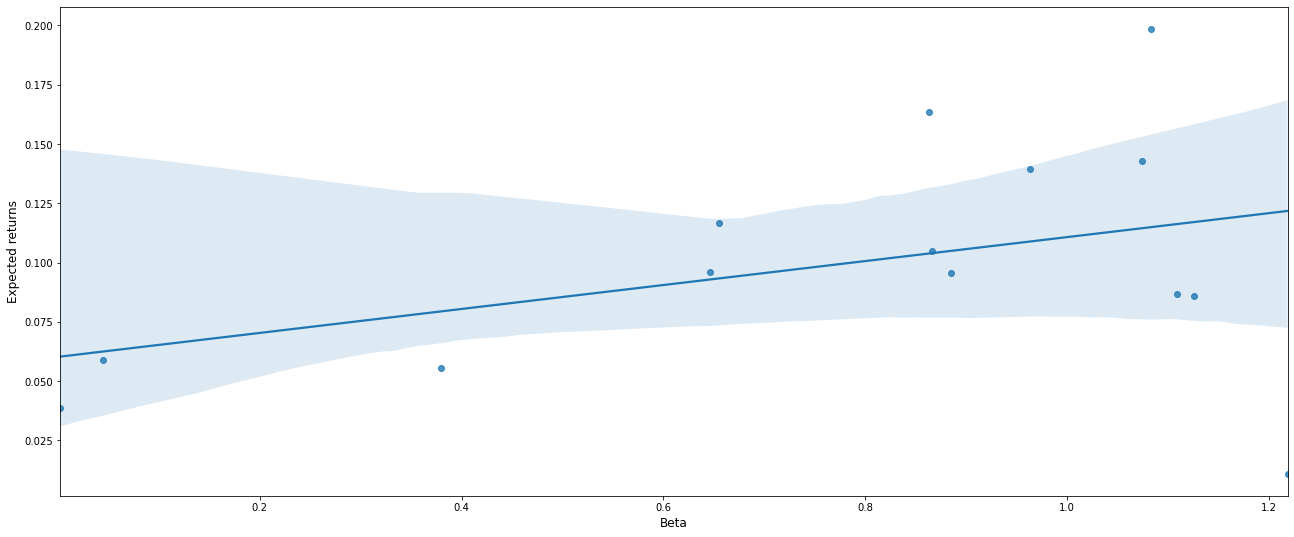

In [279]:
plt.figure(figsize = (22,9))
sns.regplot(betas, rets.mean()*252)
plt.xlabel('Beta', fontsize = 12)
plt.ylabel('Expected returns', fontsize = 12)

# Arbitrage Pricing Theory and Multifactor Models
----

### Multifactor models

Multifactor models provide better descriptions of security returns since they incorporate further sources of variability others than the market, such as interest rates, inflation and so on. Each factor has an impact on the stock return that is captured by its beta.

$$R_i = E(R_i) + \beta_{i1}F_1 + \beta_{i2}F_2... + \beta_{iN}F_N + \epsilon_i$$

The idea is that the excess return of an asset at any time equals its expected values plus a serie of factors that influence it. Each factor has zero expectation since they represent changes in these variables that have not already been anticipated. The coefficient of each factor measures the sensitivity of the excess return to that factor. For this reason the coefficient are sometimes called **factor loadings** or **factor betas**. As before, $\epsilon_i$ reflects firm-specific influences.

### Arbitrage Pricing Theory (APT)

The explotation of security mispricing in such a way that risk-free profits can be earned is called **arbitrage**. It involves the simultaneous purchase and sale of equivalent securities in order to profit from discrepancies in their prices. Under the APT, an asset is mispriced if its current price diverges from the price predicted by the multifactor model.

### The question is: What explains the differences in average returns in stocks?
A variety of asset pricing models have been proposed in the literature for understanding why different assets earn different expected rates of return. According to these models, different assets earn different expected returns only because they differ in their **systematic risk**. The models differ based on the stand they take regarding what constitutes systematic risk. Among them, the linear beta pricing models form an important class.

According to linear beta pricing models, a few economy-wide pervasive factors are sufﬁcient to represent systematic risk, and the expected return on an asset is a linear
function of its factor betas. Some beta pricing models specify what the risk factors should be **based on theoretical arguments**. Acording to the CAPM, for instance, the relevant risk factor is the return on the market portfolio. Multifactor models, instead, incorporate more risk factors. Fama-French model (which we will develop in more detail) constructs factors that capture the size and book-to-market effects documented in the literature.

Another approach followed for choosing factors is **statistical analysis** of return data. Factor Analysis and Principal Component Analysis are two examples of these procedures.


# Fama-French model

- *Fama,  E.,  and  French, K. (1992),  "The  Cross-section  of  Expected  Stock  Returns".*

- *Fama,  E.,  and  French, K. (1996),  "Multifactor Explanations of Asset Pricing Anomalies".*

Fama & French concluded that CAPM model with only one factor was not sufficient to explain all the sources of returns for a portfolio. Their observation and research led to the conclusion that portfolios built using small cap stocks that have a low price to book ratio (value stocks), tend to do better than market portfolios. Over time they have added many more factors such as momentum, operating profitability and conservative/aggressive portfolios.

The first proposed model was a 3 factor model. In the model's terminology, the three factors used are: $R_M-R_f$ (the excess return on the market) **SMB** (Small Minus Big), **HML** (High Minus Low): **Market factor, Size and Value**.

- **SMB**: "Small"/"Big" refers to companies with small/big market capitalization. This factor is referred to as the **size** factor.
- **HML**: "High"/"Low" refers to companies with a high/low book value-to-market value ratio. This factor is also referred to as the **value** factor or the "value vs growth factor".

The 3 factor model is represented by the following equation:

$$R_{it} - R_f = \alpha_i + \beta_{iM}(R_{Mt} - R_f) + \beta_{i SMB}SMB_t + \beta_{i HML}HML_t + \epsilon_{it}$$


Over time, more factors were added, such as: **CMA** (Conservative Minus Aggressive), **RMW** (Robust Minus Weak):  **Investment and Profitability** (5-factors Fama-French model (2013)), and **Momentum** (Carhart four-factor model (1997))

We can download the data of these factors from Kenneth R. French website. 

More information: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [ ]:
end = datetime(2020,10,31)
start = end + timedelta(-365*10)

# The three traditional factors + Rf:
ff_factors_rf = reader.DataReader('F-F_Research_Data_Factors', 'famafrench', start, end)[0] 
# Momentum:
momentum = reader.DataReader('F-F_Momentum_Factor', 'famafrench', start, end)[0] 

factors = ff_factors_rf[ff_factors_rf.columns[:3]].join(momentum)
Rf = ff_factors_rf[ff_factors_rf.columns[3]]

In [ ]:
factors.index = factors.index.astype('datetime64[ns]') 

In [ ]:
factors.columns = ['Market', 'Size', 'Value', 'Momentum']

In [ ]:
plt.figure(figsize = (22,9))
plt.plot(factors)
plt.legend(factors.columns, fontsize = 15)
plt.title('Last five years factor returns', fontsize = 16)
plt.grid(True)

In [ ]:
factors_by_year = factors.groupby(factors.index.year).sum().T
factors_by_year

In [ ]:
plt.figure(figsize = (22,9))
sns.heatmap(factors_by_year, annot = True, cmap='vlag_r', fmt=".2f", center = 0, linewidths=.5, annot_kws=dict(fontsize=14))
plt.xticks(size = 15)
plt.yticks(size = 15, rotation = 0)
plt.xlabel('Year', fontsize = 15)

- Momentum has been the clear winner across markets in 2020.
-  Value has been the laggard like in recent years.

## 2020 factor performance

In [ ]:
plt.figure(figsize = (22,9))
plt.plot(factors[-11:]/factors.iloc[-11])
plt.legend(factors.columns, fontsize = 15)
plt.title('2020 factor returns', fontsize = 16)
plt.autoscale(axis = 'x', tight = True)
plt.grid(True)

In [ ]:
plt.figure(figsize = (22,9))
plt.bar(factors_by_year.index, factors_by_year[2020], color = sns.color_palette(palette = 'tab20_r'))
plt.grid(True)
plt.xticks(fontsize = 15)
for x,y,label in zip(factors_by_year.index, factors_by_year[2020], factors_by_year[2020].round(2)):
    plt.annotate(label, 
                  (x,y), 
                     textcoords="offset points", 
                     xytext=(0,5), 
                     ha='center',
                     size = 16)

## Correlation between factors

In [ ]:
cmap = sns.diverging_palette(h_neg=20, h_pos=135, as_cmap=True)

corr = factors.corr()
plt.figure(figsize = (22,9))
sns.heatmap(corr, annot = True, cmap=cmap, fmt=".2f", linewidths=.5, annot_kws=dict(fontsize=14))
plt.xticks(size = 15)
plt.yticks(size = 15, rotation = 0)

## Fama-MacBeth regression

Given data on risk factors and portfolio returns, it is useful to estimate the portfolio's exposure, that is, how much the risk factors drive portfolio returns, as well as how much the exposure to a given factor is worth, that is,  what the market's risk factor premia is. The risk premia then permits to estimate the return for any portfolio provided the factor exposure is known or can be assumed.

In this section we will perform the cross-sectional regression estimator originally developed by Fama and MacBeth (1973).

More formally, we will have $i=1, ..., N$ asset or portfolio returns over $t=1, ..., T$ periods and each asset's excess period return will be denoted. The goals is to test whether the $j=1, ..., M$ factors explain the excess returns and the risk premium associated with each factor. 

Factor models are estimated for many stocks in a given period. Inference problems will likely arise in such cross-sectional regressions because the fundamental assumptions of classical linear regression may not hold. Potential violations include measurement errors, covariation of residuals due to heteroskedasticity and serial correlation, and multicollinearity.

To address the inference problem caused by the correlation of the residuals, Fama and MacBeth proposed a two-step methodology for a cross-sectional regression of returns on factors. The **two-stage Fama-Macbeth regression** is designed to estimate the premium rewarded for the exposure to a particular risk factor by the market. The two stages consist of:

### 1. First stage:
$N$ time-series regression, one for each asset or portfolio, of its excess returns on the factors to estimate the factor loadings. In matrix form, for each asset:

$$r_i = F \beta_i +\epsilon_i$$

where $r_i$ is a $T \times 1$, $F$ is a $T \times (M+1)$ matrix, $\beta_i$ is a $(M+1)\times 1$ matrix and $\epsilon_i$ a $T\times1$ vector.

### 2. Second stage:
$T$ cross-sectional regression, one for each time period, to estimate the risk premium. In matrix form, we obtain a vector $\hat{\lambda}$ of risk premia for each period:

$$r_t = \hat{\beta}\lambda_t$$

where $r_t$ is a $N\times(M+1)$ matrix, $\\hat{\beta}$ is a $N\times(M+1)$ matrix and $\lambda_t$ a $(M+1)\times1$ vector.


Now we can compute the factor risk premia as the time average and get t-statistic to assess their individual significance, using the assumption that the risk premia estimates are independent over time:


In [ ]:
portfolios = reader.DataReader('12_Industry_Portfolios', 'famafrench', start, end)[0]

In [ ]:
portfolios.head()

In [ ]:
factors.head()

In [ ]:
# Shape information
T,M = factors.shape
T,N = portfolios.shape

# Reshape rf and compute excess returns
excessReturns = portfolios - Rf

In [ ]:
print('T = ' + str(T))
print('M = ' + str(M))
print('N = ' + str(N))

The next block does 2 things:

- Compute the time-series $\beta$s. This is done be regressing the full array of excess returns on the factors (augmented with a constant) using LSTSQ. (See https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)


- Compute the risk premia using a cross-sectional regression of average excess returns on the estimates βs. This is a standard regression where the step 1 β estimates are used as regressors, and the dependent variable is the average excess return.

In [ ]:
# First step: Time series regressions

betas = []
F = sm.add_constant(factors)

for industry in portfolios.columns:
    step1 = sm.OLS(endog=portfolios[industry].values.reshape(-1,1), exog=F).fit()
    betas.append(step1.params.drop('const'))

betas = pd.DataFrame(betas,
                     columns=factors.columns,
                     index=portfolios.columns)
betas.info()

In [ ]:
betas

In [ ]:
lambdas = []
for period in portfolios.index:
    step2 = sm.OLS(endog=portfolios.loc[period, betas.index],
                exog=betas).fit()
    lambdas.append(step2.params)

lambdas = pd.DataFrame(lambdas,
                       index=portfolios.index,
                       columns=betas.columns.tolist())
lambdas.info()

In [ ]:
lambdas.mean()

The **linearmodels** library extends statsmodels with various models for panel data and also implements the two-stage Fama-MacBeth procedure:

In [ ]:
import linearmodels as lm

model = lm.LinearFactorModel(portfolios=portfolios, 
                             factors=factors)
res = model.fit()
res